In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

## Plot Setup

In [2]:
pallete = ["#AB0FEB", "#FFB667", "#222DC1", "#1CA571", "#C4010F", "#7304BB", "#FF700A"]
sns.set_theme(style="whitegrid", palette=pallete)
sns.color_palette(pallete)

[(0.6705882352941176, 0.058823529411764705, 0.9215686274509803),
 (1.0, 0.7137254901960784, 0.403921568627451),
 (0.13333333333333333, 0.17647058823529413, 0.7568627450980392),
 (0.10980392156862745, 0.6470588235294118, 0.44313725490196076),
 (0.7686274509803922, 0.00392156862745098, 0.058823529411764705),
 (0.45098039215686275, 0.01568627450980392, 0.7333333333333333),
 (1.0, 0.4392156862745098, 0.0392156862745098)]

## Progress Filtering

In [3]:
testProgress = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/testProgress/documents.jsonl", lines=True)
testProgress

,_creationTime,_id,name,stage,testNumber,testSubStage
0,1.763459e+12,m97022t2bhh6nys0ngcqn7e9zd7vmagc,ridiculous-tomato-krill,completed,29,documentation
1,1.763467e+12,m971kn4cb4fba71mrt8ms1drbh7vmana,fiscal-cyan-gazelle,pre-survey,1,request
2,1.763460e+12,m971ybz4ys86tmrqk8p5gq0ned7vmjmt,probable-gray-condor,information,1,request
3,1.763467e+12,m972awcjqtm9xcws7k6dsnbjxd7vn1yj,young-jade-tiglon,test,8,documentation
4,1.763460e+12,m972h5z2rnhe0qa408agrrxxjh7vm6b8,probable-gray-condor,completed,29,documentation
5,1.763466e+12,m972k4cbdph48qayb47qrwz5hn7vm593,greasy-magenta-bird,pre-survey,1,request
6,1.763467e+12,m97440a09wn6y70g3ar4zbhbz17vmykn,young-jade-tiglon,information,1,request
7,1.763468e+12,m97494j4b92t32ac8gtv7gc3217vna7n,Emps777,test,2,request
8,1.762525e+12,m974tb3r3k0vnkjcy9q3b651cd7tzgbp,test-1,test,3,request
9,1.763467e+12,m9767qdnv0rf8ry6vf79jqqmdn7vm53r,awful-green-lamprey,pre-survey,1,request


In [4]:
testProgress = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/testProgress/documents.jsonl", lines=True)
testProgress = testProgress[testProgress["stage"] == "completed"]
testProgress = testProgress.reindex()
testProgress

,_creationTime,_id,name,stage,testNumber,testSubStage
0,1.763459e+12,m97022t2bhh6nys0ngcqn7e9zd7vmagc,ridiculous-tomato-krill,completed,29,documentation
4,1.763460e+12,m972h5z2rnhe0qa408agrrxxjh7vm6b8,probable-gray-condor,completed,29,documentation
12,1.763466e+12,m977jj7k02707tz2s5pq4qv5jh7vm2zz,busy-plum-buzzard,completed,29,documentation
14,1.762085e+12,m9798ph4t35j8ds4az55eaj0ks7tn5ap,exuberant-coral-pony,completed,30,request
15,1.762526e+12,m97a9c77vg4dvy35bg5y1jgef17tzqjr,shocked-brown-pelican,completed,29,documentation
17,1.763374e+12,m97cajdk7yh10b9y6354kfwtfh7vjb88,wealthy-pink-haddock,completed,29,documentation
18,1.763466e+12,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,fluffy-amethyst-dingo,completed,29,documentation


## Pre-Survey

In [5]:
pre_survey = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/preSurveyResults/documents.jsonl", lines=True)
# remove all incomplete entries based on testProgress IDs
pre_survey = pre_survey[pre_survey["progressId"].isin(testProgress["_id"])]
pre_survey = pre_survey.reset_index(drop=True)
pre_survey



,_creationTime,_id,age,aiFormalTraining,aiHelpfulAreas,aiHelpfulAreasOther,aiHumanFactorConcern,aiTrust,aiUnderstanding,comfortNewClinicalTech,...,progressId,rolloutSupport,softwareConfidence,stressInfluenceOnAdoption,systemsUsed,systemsUsedOther,teamOpenness,techImpactOnCareQuality,workloadLevel,yearsExperience
0,1.762526e+12,kh703fwq8kkkvbe4tj56b06f9n7tyxza,25,Nein,"[Dokumentation, Alarmmanagement, Kommunikation]",,Nein,Vollständig,Etwas,Neutral,...,m97a9c77vg4dvy35bg5y1jgef17tzqjr,Viel,Sehr sicher,Wenig,"[Medikationssystem, Telemetrie/Monitoring]",,Sehr offen,Sehr positiv,Sehr hoch,7
1,1.763466e+12,kh75r6gr2h3jh57x031eg2vnp97vmwdg,21,Nein,"[Dokumentation, Kommunikation, Alarmmanagement]",,Eher nein,Eher,Sehr gut,Wohl,...,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,Sehr viel,Sehr sicher,Etwas,"[Elektronische Patientenakte (EPA), Medikation...",,Eher skeptisch,Eher positiv,Mittel,4
2,1.763465e+12,kh763te8a4jfmw24bhfpw4pmf57vnc4p,24,Nein,"[Dokumentation, Alarmmanagement, Kommunikation]",,Eher nein,Eher,Etwas,Wohl,...,m97022t2bhh6nys0ngcqn7e9zd7vmagc,Ausreichend,Sehr sicher,Etwas,"[Elektronische Patientenakte (EPA), Dienstplan...",,Neutral,Eher positiv,Hoch,0
3,1.762086e+12,kh76ygjxa34rdp4713bxfef93d7tmrkw,26,Nein,"[Dokumentation, Alarmmanagement]",,Unsicher,Neutral,Etwas,Neutral,...,m9798ph4t35j8ds4az55eaj0ks7tn5ap,Keine,Neutral,Stark,"[Elektronische Patientenakte (EPA), Medikation...",,Neutral,Neutral,Hoch,7
4,1.763461e+12,kh77nja90hrhw35fqg9tf2td697vmk8w,23,Ja,"[Triage, Dokumentation, Alarmmanagement, Kommu...",,Nein,Neutral,Sehr gut,Wohl,...,m972h5z2rnhe0qa408agrrxxjh7vm6b8,Wenig,Eher sicher,Stark,[KI-gestützte Tools],,Eher offen,Eher positiv,Sehr hoch,2
5,1.763374e+12,kh792fgcy4r3c1wj5gjacsjdtn7vjezz,22,Ja,"[Dokumentation, Entscheidungsunterstützung]",,Nein,Eher,Gut,Wohl,...,m97cajdk7yh10b9y6354kfwtfh7vjb88,Viel,Sehr sicher,Gar nicht,"[Elektronische Patientenakte (EPA), Dienstplan...",,Eher offen,Eher positiv,Mittel,3
6,1.763466e+12,kh7bpb0hjc94dvsw8s4pbnvgb57vn5fy,24,Nein,"[Dokumentation, Triage, Alarmmanagement]",,Eher ja,Neutral,Wenig,Neutral,...,m977jj7k02707tz2s5pq4qv5jh7vm2zz,Ausreichend,Eher unsicher,Etwas,[Elektronische Patientenakte (EPA)],,Eher skeptisch,Neutral,Hoch,6


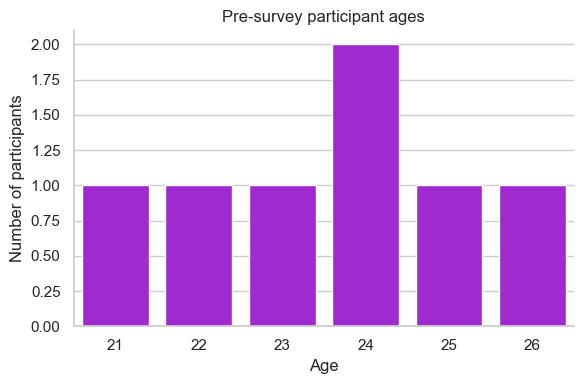

In [6]:
# bar plot of ages
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=pre_survey, x="age", order=sorted(pre_survey["age"].unique()))
ax.set_xlabel("Age")
ax.set_ylabel("Number of participants")
ax.set_title("Pre-survey participant ages")
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

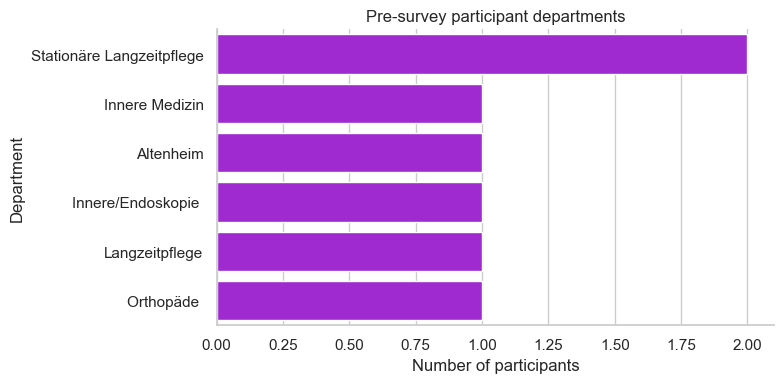

In [7]:
# department distribution
fig, ax = plt.subplots(figsize=(8, 4))
dept_order = pre_survey["department"].value_counts().index
sns.countplot(data=pre_survey, y="department", order=dept_order)
ax.set_xlabel("Number of participants")
ax.set_ylabel("Department")
ax.set_title("Pre-survey participant departments")
sns.despine(ax=ax)
plt.tight_layout()
plt.show()


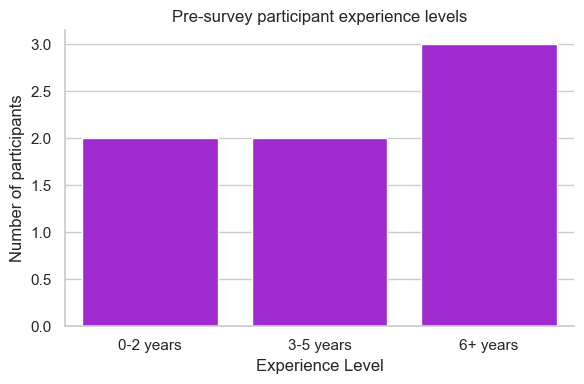

In [8]:
# bar plot of experience levels in years in 3 buckets (0-2, 3-5, 6+)
pre_survey["experience_level"] = pd.cut(pre_survey["yearsExperience"], bins=[-1, 2, 5, 100], labels=["0-2 years", "3-5 years", "6+ years"])
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=pre_survey, x="experience_level", order=["0-2 years", "3-5 years", "6+ years"])
ax.set_xlabel("Experience Level")
ax.set_ylabel("Number of participants")
ax.set_title("Pre-survey participant experience levels")
sns.despine(ax=ax)
plt.tight_layout()
plt.show()

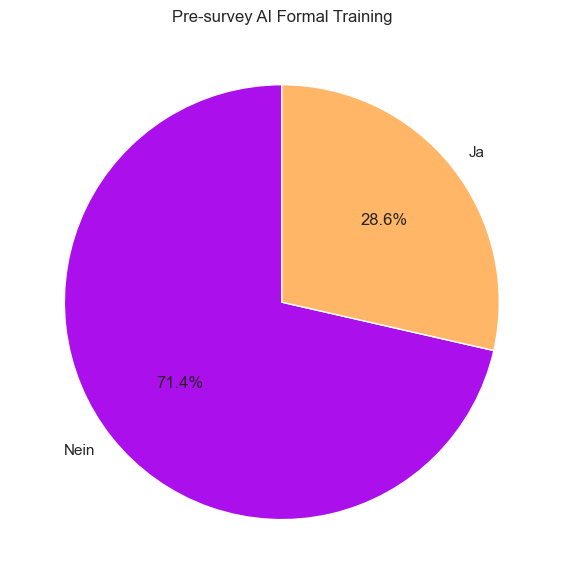

In [9]:
# pie plot "aiFormalTraining" ja/ nein
ai_training_counts = pre_survey["aiFormalTraining"].value_counts()
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(ai_training_counts, labels=ai_training_counts.index, autopct="%1.1f%%", startangle=90, colors=[pallete[0], pallete[1]])
ax.set_title("Pre-survey AI Formal Training")
plt.tight_layout()
plt.show()

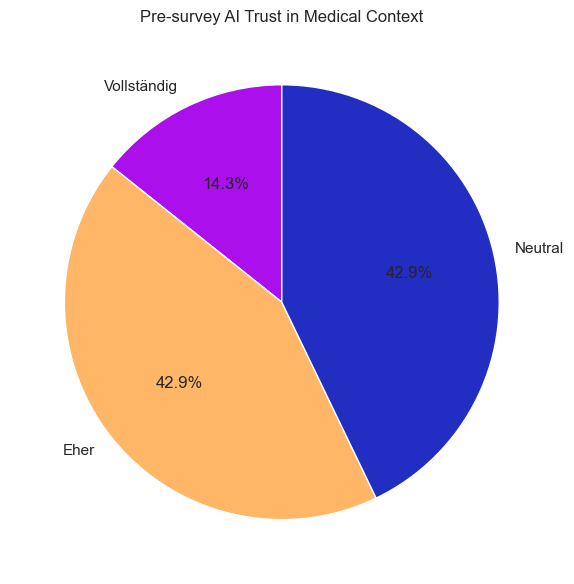

In [10]:
# pie chart "aiTrust" having "trust in AI in medical context" with options  "Überhaupt nicht", "Eher nicht","Neutral","Eher","Vollständig" (some might be missing)
ai_trust_counts = pre_survey["aiTrust"].value_counts().reindex(list(pre_survey["aiTrust"].unique()))
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(ai_trust_counts, labels=ai_trust_counts.index, autopct="%1.1f%%", startangle=90, colors=pallete[:5])
ax.set_title("Pre-survey AI Trust in Medical Context")
plt.tight_layout()
plt.show()

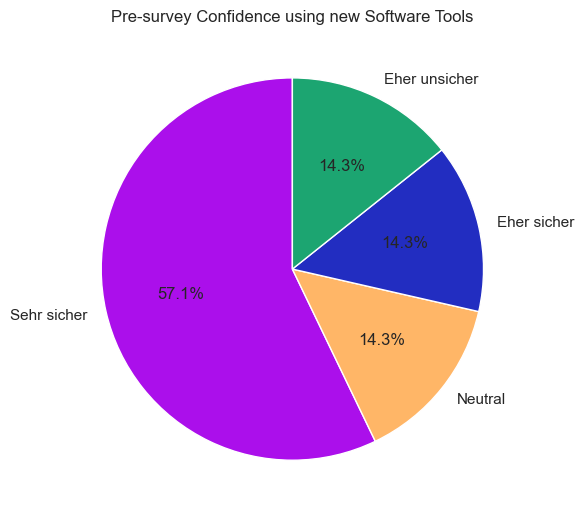

In [11]:
# pie chart "softwareConfidence" having "confidence in using software tools" with options "Sehr unsicher", "Eher unsicher", "Neutral", "Eher sicher", "Sehr sicher"
software_confidence_counts = pre_survey["softwareConfidence"].value_counts().reindex(list(pre_survey["softwareConfidence"].unique()))
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(software_confidence_counts, labels=software_confidence_counts.index, autopct="%1.1f%%", startangle=90, colors=pallete[:5])
ax.set_title("Pre-survey Confidence using new Software Tools")
plt.tight_layout()
plt.show()

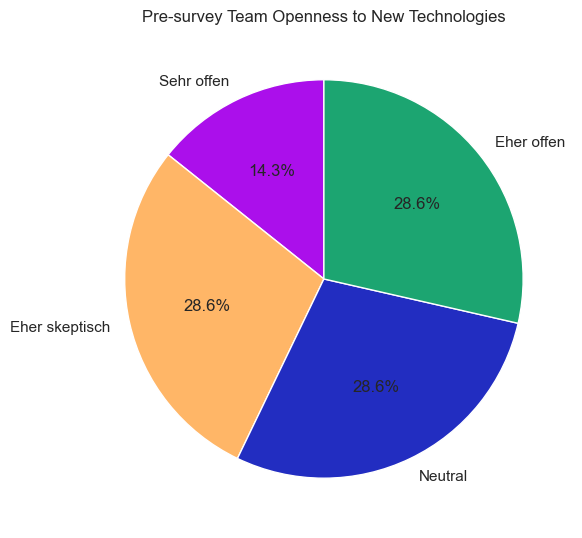

In [12]:
# pie chart teamOpenness having "estimation how open their team is to new techologies and innovations" with options "Sehr verschlossen", "Eher skeptisch", "Neutral", "Eher offen", "Sehr offen"
team_openness_counts = pre_survey["teamOpenness"].value_counts().reindex(list(pre_survey["teamOpenness"].unique()))
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(team_openness_counts, labels=team_openness_counts.index, autopct="%1.1f%%", startangle=90, colors=pallete[:5])
ax.set_title("Pre-survey Team Openness to New Technologies")
plt.tight_layout()
plt.show()

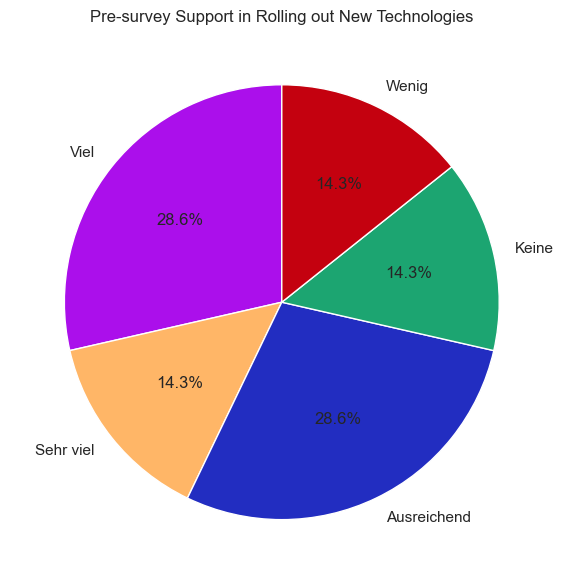

In [13]:
# pie chart support in rolling out technologie: rolloutSupport
rollout_count = pre_survey["rolloutSupport"].value_counts().reindex(list(pre_survey["rolloutSupport"].unique()))
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(rollout_count, labels=rollout_count.index, autopct="%1.1f%%", startangle=90, colors=pallete[:5])
ax.set_title("Pre-survey Support in Rolling out New Technologies")
plt.tight_layout()
plt.show()

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/2746461621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=belastungs_count.index, y=belastungs_count.values, palette=pallete[:len(belastungs_count)])


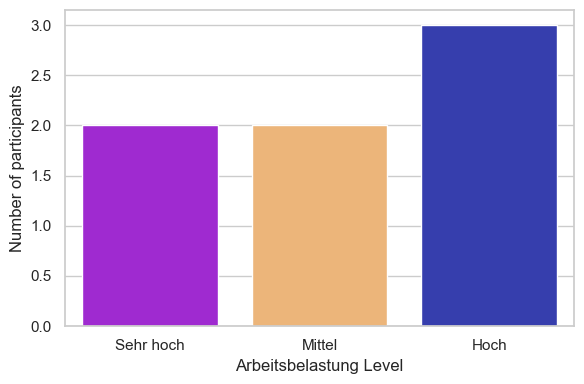

In [14]:
# bar chart arbeitsbelastung 
belastungs_count = pre_survey["workloadLevel"].value_counts().reindex(list(pre_survey["workloadLevel"].unique()))
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=belastungs_count.index, y=belastungs_count.values, palette=pallete[:len(belastungs_count)])
ax.set_xlabel("Arbeitsbelastung Level")
ax.set_ylabel("Number of participants")
plt.tight_layout()
plt.show()

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/3120471797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stress_influence_count.index, y=stress_influence_count.values, palette=pallete[:len(stress_influence_count)])


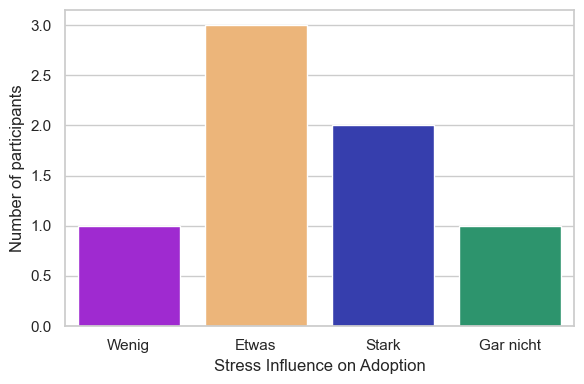

In [15]:
# bar chart stress influence on trying new technologies
stress_influence_count = pre_survey["stressInfluenceOnAdoption"].value_counts().reindex(list(pre_survey["stressInfluenceOnAdoption"].unique()))
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x=stress_influence_count.index, y=stress_influence_count.values, palette=pallete[:len(stress_influence_count)])
ax.set_xlabel("Stress Influence on Adoption")
ax.set_ylabel("Number of participants")
plt.tight_layout() 
plt.show()

## Post Survey

In [16]:
postDf = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/postSurveyResults/documents.jsonl", lines=True)
# remove all incomplete entries based on testProgress IDs
post_survey = postDf[postDf["progressId"].isin(testProgress["_id"])]
post_survey = post_survey.reset_index(drop=True)
post_survey

,_creationTime,_id,anxietyDiminishSkills,anxietyLessPersonal,anxietyUneasyWithAIDecisions,compareToOtherMethods,easyTask,easyToLearn,feedbackImproveConfidence,fxdCorrectionsUsefulSignal,...,productivityIncrease,progressId,systemUsability,trustConfidenceInfo,trustDependOnPrioritisation,trustReliability,usefulness,workSupport,workflowFitNatural,workflowPaceManageable
0,1.762528e+12,kd73p9ftbs21be8g4ffycxad3n7tz27r,2,1,2,5,5,5,5,4,...,5,m97a9c77vg4dvy35bg5y1jgef17tzqjr,5,4,3,5,5,5,5,5
1,1.762090e+12,kd751k0dcpw9pcnvr19n1tjbpx7tnzzz,2,1,2,4,4,4,5,4,...,3,m9798ph4t35j8ds4az55eaj0ks7tn5ap,5,3,4,4,4,3,4,4
2,1.763376e+12,kd75gw2d360mbqz94p75ek6nbh7vjd6r,1,1,1,3,3,5,3,3,...,3,m97cajdk7yh10b9y6354kfwtfh7vjb88,5,4,3,3,4,4,4,5
3,1.763466e+12,kd75shretf42q9p042v2es4v3s7vmtb3,3,2,2,5,5,4,4,4,...,5,m977jj7k02707tz2s5pq4qv5jh7vm2zz,4,5,4,4,5,4,3,4
4,1.763466e+12,kd76yn1xjgx6xkrmrx0fyy6d817vn74w,5,4,5,3,5,5,5,5,...,5,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,5,5,5,5,5,5,5,5
5,1.763461e+12,kd78veaxfc4rv17rrqz4sehh1d7vm9sc,3,3,3,5,4,5,3,5,...,4,m972h5z2rnhe0qa408agrrxxjh7vm6b8,5,4,2,4,5,5,4,4
6,1.763465e+12,kd7afdn63awf3jwg59gwx4ppj57vmscn,3,3,3,3,3,3,3,3,...,3,m97022t2bhh6nys0ngcqn7e9zd7vmagc,3,3,3,3,3,3,3,3


In [17]:
sections = {
    "FxE: Feedback durch Erklärung": [
        ("fxeActionEasy", "5.1 Erklärung anfordern war leicht"),
        ("fxeExplanationClearHelpful", "5.2 Erklärung war klar & hilfreich"),
        ("fxeSimpleRatingConvenient", "5.3 Einfache Bewertung bequem"),
    ],
    "FxD:  Feedback durch Dokumentation": [
        ("fxdDocEditsNatural", "5.4 Doc-Korrekturen fühlen sich natürlich an"),
        ("fxdNotTimeConsuming", "5.5 Dokumentation war nicht zeitaufwendig"),
        ("fxdCorrectionsUsefulSignal", "5.6 Korrekturen sind ein nützliches Signal"),
    ],
    "Allgemeine Feedback-Qualität": [
        ("feedbackImproveConfidence", "5.7 Feedback hilft MediEm zu verbessern"),
    ],
}

# Long-Format erzeugen
rows = []
for section_name, items in sections.items():
    for col, label in items:
        for value in post_survey[col].dropna():
            rows.append({
                "section": section_name,
                "question": label,
                "value": value
            })

df_long = pd.DataFrame(rows)
df_long.head()

,section,question,value
0,FxE: Feedback durch Erklärung,5.1 Erklärung anfordern war leicht,5
1,FxE: Feedback durch Erklärung,5.1 Erklärung anfordern war leicht,4
2,FxE: Feedback durch Erklärung,5.1 Erklärung anfordern war leicht,3
3,FxE: Feedback durch Erklärung,5.1 Erklärung anfordern war leicht,5
4,FxE: Feedback durch Erklärung,5.1 Erklärung anfordern war leicht,5


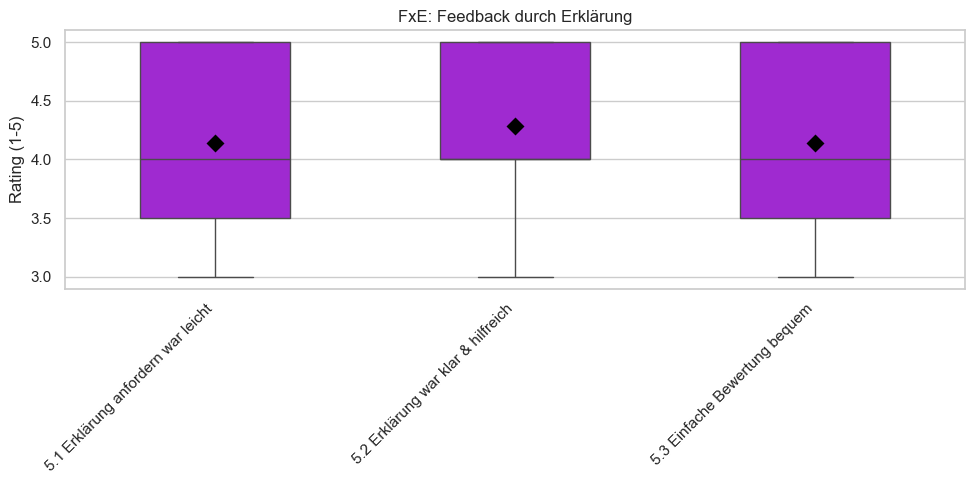

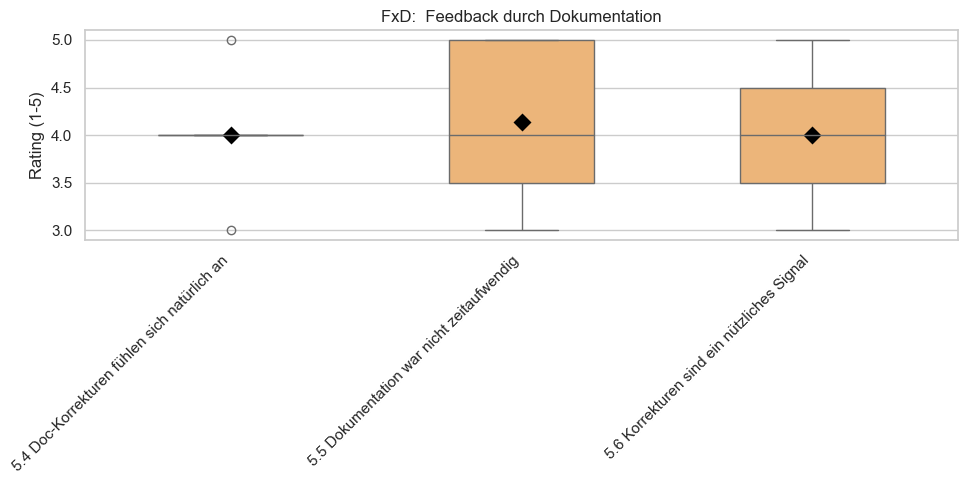

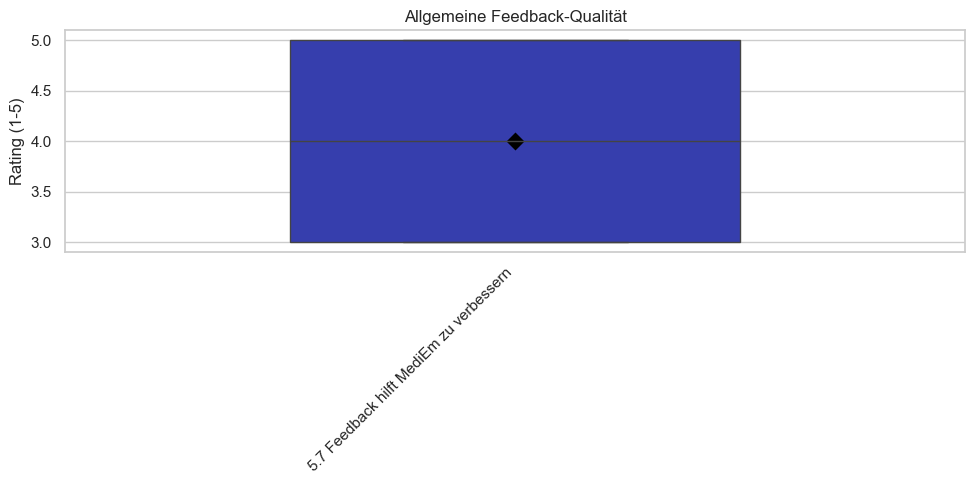

In [18]:
for ind, section_name in enumerate(df_long["section"].unique()):
    df_sec = df_long[df_long["section"] == section_name]

    plt.figure(figsize=(10, 5))

    # Boxplots
    sns.boxplot(
        data=df_sec,
        x="question",
        y="value",
        width=0.5,
        color=pallete[ind % len(pallete)]
    )

    # Mittelwertpunkte draufsetzen
    sns.pointplot(
        data=df_sec,
        x="question",
        y="value",
        color="black",
        estimator="mean",
        markers="D",
        linestyles="",
        errorbar=None
    )

    plt.xticks(rotation=45, ha="right")
    plt.title(section_name)
    plt.ylabel("Rating (1-5)")
    plt.xlabel("")

    plt.tight_layout()
    plt.show()

In [19]:
# Abschnitt 4: Trust, Anxiety, Workflow
items_4 = [
    # Trust in AI
    ("trustConfidenceInfo",        "4.1", "Trust – Zuversicht bzgl. Informationen/Empfehlungen"),
    ("trustReliability",           "4.2", "Trust – System ist zuverlässig"),
    ("trustDependOnPrioritisation","4.3", "Trust – Würde mich auf Priorisierung verlassen"),

    # AI Anxiety
    ("anxietyLessPersonal",        "4.4", "Anxiety – Pflege könnte weniger persönlich werden"),
    ("anxietyUneasyWithAIDecisions","4.5","Anxiety – KI-Entscheidungen verunsichern mich"),
    ("anxietyDiminishSkills",      "4.6", "Anxiety – Sorge um eigene Urteilsfähigkeit"),

    # Workflow & Cognitive Load
    ("workflowFitNatural",         "4.7", "Workflow – Nutzung fügte sich natürlich ein"),
    ("workflowPaceManageable",     "4.8", "Workflow – Arbeitstempo war gut bewältigbar"),
    ("interfaceLowMentalEffort",   "4.9", "Workflow – UI brauchte wenig mentalen Aufwand"),
    ("noTaskDisruption",           "4.10","Workflow – System störte primäre Aufgaben nicht"),
]

# Optional: Mapping für spätere Legende/Tabelle
question_map = {code: text for _, code, text in items_4}

In [20]:
rows = []
for col, code, text in items_4:
    # Falls es fehlende Werte gibt, lieber rausschmeißen
    for value in post_survey[col].dropna():
        rows.append({
            "question_code": code,
            "question_text": text,
            "value": value
        })

df_4_long = pd.DataFrame(rows)
df_4_long.head()

,question_code,question_text,value
0,4.1,Trust – Zuversicht bzgl. Informationen/Empfehl...,4
1,4.1,Trust – Zuversicht bzgl. Informationen/Empfehl...,3
2,4.1,Trust – Zuversicht bzgl. Informationen/Empfehl...,4
3,4.1,Trust – Zuversicht bzgl. Informationen/Empfehl...,5
4,4.1,Trust – Zuversicht bzgl. Informationen/Empfehl...,5


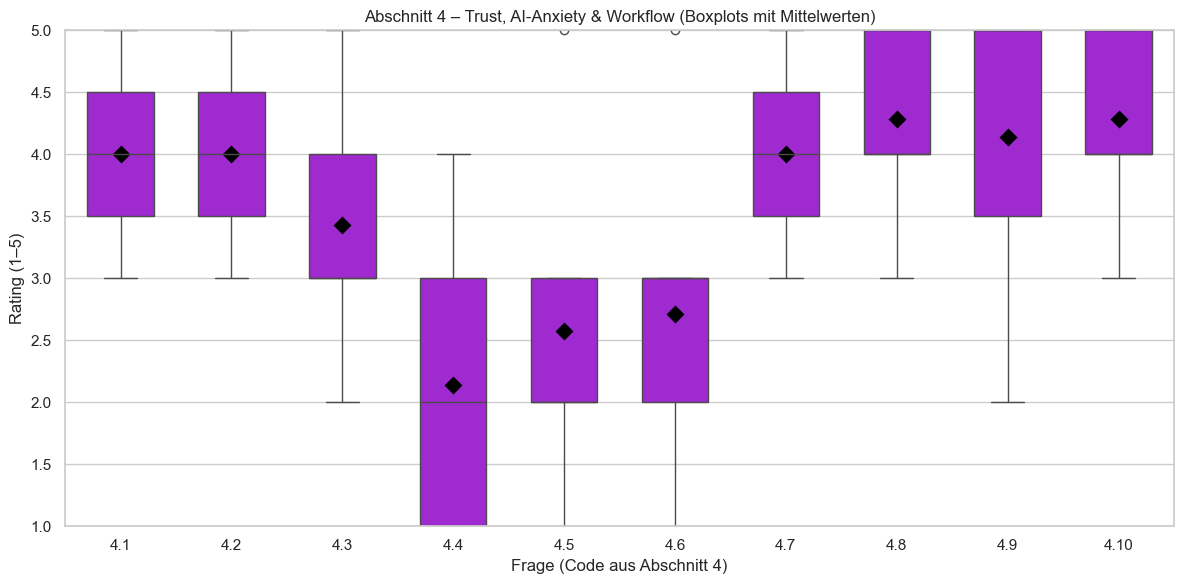

In [21]:
plt.figure(figsize=(12, 6))

# Boxplots pro Frage
sns.boxplot(
    data=df_4_long,
    x="question_code",
    y="value",
    width=0.6
)

# Mittelwerte als Punkte
sns.pointplot(
    data=df_4_long,
    x="question_code",
    y="value",
    estimator="mean",
    errorbar=None,
    markers="D",
    linestyles="",
    color="black"
)

plt.ylim(1, 5)  # Likert-Skala 1–5
plt.ylabel("Rating (1–5)")
plt.xlabel("Frage (Code aus Abschnitt 4)")
plt.title("Abschnitt 4 – Trust, AI-Anxiety & Workflow (Boxplots mit Mittelwerten)")

plt.tight_layout()
plt.show()

## ClickLogs

In [22]:
clicks = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/testClickLogs/documents.jsonl", lines=True)
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _creationTime       828 non-null    float64       
 1   _id                 828 non-null    object        
 2   content             828 non-null    object        
 3   elapsedTimeSeconds  828 non-null    int64         
 4   elementId           828 non-null    object        
 5   progressId          828 non-null    object        
 6   testNumber          828 non-null    int64         
 7   testSubStage        828 non-null    object        
 8   timestamp           828 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 58.3+ KB


In [23]:
# remove clicks from none finished ptogresses
clicks_cleaned = clicks[clicks["progressId"].isin(testProgress["_id"])]
clicks_cleaned = clicks_cleaned.reset_index(drop=True)
clicks_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _creationTime       733 non-null    float64       
 1   _id                 733 non-null    object        
 2   content             733 non-null    object        
 3   elapsedTimeSeconds  733 non-null    int64         
 4   elementId           733 non-null    object        
 5   progressId          733 non-null    object        
 6   testNumber          733 non-null    int64         
 7   testSubStage        733 non-null    object        
 8   timestamp           733 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 51.7+ KB


In [24]:
clicks_cleaned.head()

,_creationTime,_id,content,elapsedTimeSeconds,elementId,progressId,testNumber,testSubStage,timestamp
0,1.763375e+12,m1700vdmc2p66rq9tj67ssash17vjwr7,Dokumentation speichern,11,continue-button,m97cajdk7yh10b9y6354kfwtfh7vjb88,2,documentation,2025-11-17 10:15:17.539
1,1.763375e+12,m1703v2bzmckd12t3rpamjtpah7vjgaq,Dokumentation speichern,77,continue-button,m97cajdk7yh10b9y6354kfwtfh7vjb88,9,documentation,2025-11-17 10:24:38.601
2,1.763466e+12,m17047aq69404wrevm0vpas1hn7vnq5a,Weiter,2,continue-button,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,3,request,2025-11-18 11:43:16.796
3,1.763465e+12,m17056f6r4gkgeyngrz08axsfd7vnj93,Weiter,1,continue-button,m97022t2bhh6nys0ngcqn7e9zd7vmagc,25,request,2025-11-18 11:19:33.283
4,1.763376e+12,m1705br7qqb8xxba17em241vh57vja9z,übernehmen,5,take-request-button,m97cajdk7yh10b9y6354kfwtfh7vjb88,21,request,2025-11-17 10:33:22.738


In [25]:
# create df for request and documentation stage
request_stage_clicks = clicks_cleaned[clicks_cleaned["testSubStage"] == "request"].copy()
documentation_stage_clicks = clicks_cleaned[clicks_cleaned["testSubStage"] == "documentation"].copy()

print(f"Amount of clicks in request stage: {len(request_stage_clicks)}")
print(f"Amount of clicks in documentation stage: {len(documentation_stage_clicks)}")

Amount of clicks in request stage: 473
Amount of clicks in documentation stage: 260


### Request Analysis

In [26]:
# we want to have a table for each progressId showing the testNumber, time till "Weiter" was clicked (timeSpend on Request), if explanation button was clicked, and when in sek, and also if the explanation was rated simply a field with None, Up or Down.

def summarize_request(group: pd.DataFrame) -> pd.Series:
    # testNumber ist jetzt Teil des groupby, also innerhalb der Gruppe konstant
    test_number = group["testNumber"].iloc[0]
    progress_id = group["progressId"].iloc[0]

    # --- Zeit bis "Weiter" geklickt ---
    # Annahme: "Weiter" steht als Text in content (Button-Klick)
    weiter_rows = group[
        group["content"]
        .fillna("")
        .str.contains("Weiter", case=False, na=False)
    ]
    time_to_weiter = (
        weiter_rows["elapsedTimeSeconds"].min()
        if not weiter_rows.empty
        else np.nan
    )

    # --- Explanation-Button-Klick ---
    expl_rows = group[group["elementId"] == "show-explanation-button"]
    explanation_clicked = not expl_rows.empty
    explanation_click_time = (
        expl_rows["elapsedTimeSeconds"].min()
        if explanation_clicked
        else np.nan
    )

    # --- Rating (Up / Down / None) ---
    rating_events = group[group["elementId"].isin(
        ["explanation-thumbs-up-button", "explanation-thumbs-down-button"]
    )].sort_values("_creationTime")

    if rating_events.empty:
        explanation_rating = None
    else:
        # letztes Rating-Event zählt (falls jemand um entscheidet)
        last_elem = rating_events["elementId"].iloc[-1]
        if last_elem == "explanation-thumbs-up-button":
            explanation_rating = "Up"
        elif last_elem == "explanation-thumbs-down-button":
            explanation_rating = "Down"
        else:
            explanation_rating = None  # Fallback

    return pd.Series({
        "progressId": progress_id,
        "testNumber": test_number,
        "time_to_weiter_s": time_to_weiter,
        "explanation_clicked": explanation_clicked,
        "explanation_click_time_s": explanation_click_time,
        "explanation_rating": explanation_rating,
    })


summary = (
    request_stage_clicks
    .groupby(["progressId", "testNumber"], as_index=False)
    .apply(summarize_request)
)

# Optional sortieren: erst nach progressId, dann testNumber
summary = summary.sort_values(["progressId", "testNumber"])

summary

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/3887662414.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_request)


,progressId,testNumber,time_to_weiter_s,explanation_clicked,explanation_click_time_s,explanation_rating
0,m97022t2bhh6nys0ngcqn7e9zd7vmagc,1,18,False,NaN,None
1,m97022t2bhh6nys0ngcqn7e9zd7vmagc,2,15,False,NaN,None
2,m97022t2bhh6nys0ngcqn7e9zd7vmagc,3,2,False,NaN,None
3,m97022t2bhh6nys0ngcqn7e9zd7vmagc,4,1,False,NaN,None
4,m97022t2bhh6nys0ngcqn7e9zd7vmagc,5,2,False,NaN,None
...,...,...,...,...,...,...
196,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,25,1,False,NaN,None
197,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,26,1,False,NaN,None
198,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,27,1,False,NaN,None
199,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,28,1,False,NaN,None


In [27]:
def flag_outliers(group: pd.DataFrame) -> pd.DataFrame:
    x = group["time_to_weiter_s"]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    group = group.copy()
    group["is_outlier"] = (x < lower) | (x > upper)
    return group

summary_flagged = (
    summary
    .dropna(subset=["time_to_weiter_s"])
    .groupby("testNumber", group_keys=False)
    .apply(flag_outliers)
)

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/3503888028.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers)


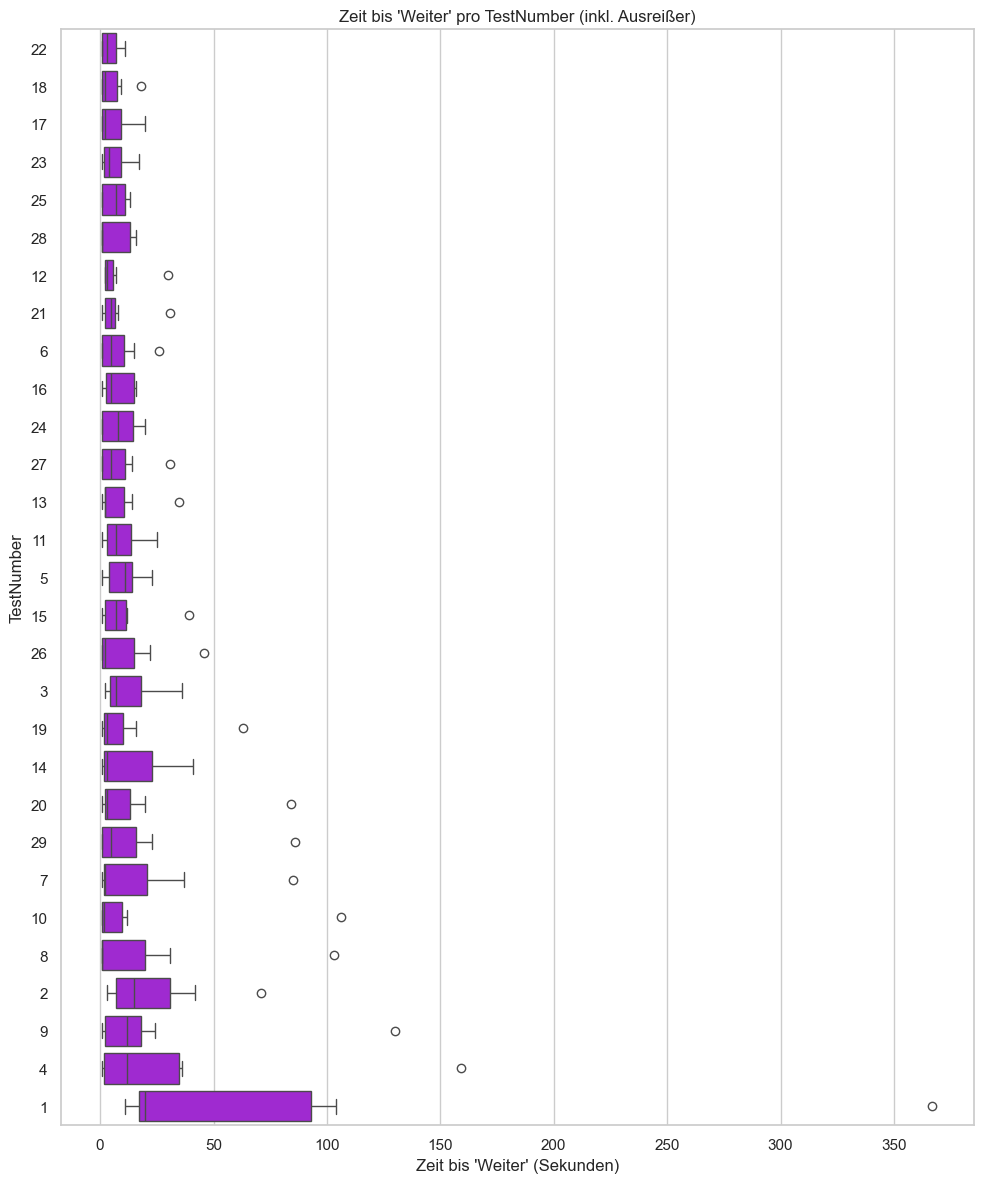

In [28]:
# Testnummern nach mittlerer Dauer sortieren (optional, aber nice)
order = (
    summary_flagged
    .groupby("testNumber")["time_to_weiter_s"]
    .mean()
    .sort_values()
    .index
)

plt.figure(figsize=(10, 12))

sns.boxplot(
    data=summary_flagged,
    x="time_to_weiter_s",
    y="testNumber",
    orient="h",
    order=order,
    showfliers=True  # Standard ist True, sorgt für automatische Ausreißer-Anzeige
)

plt.xlabel("Zeit bis 'Weiter' (Sekunden)")
plt.ylabel("TestNumber")
plt.title("Zeit bis 'Weiter' pro TestNumber (inkl. Ausreißer)")
plt.tight_layout()
plt.show()

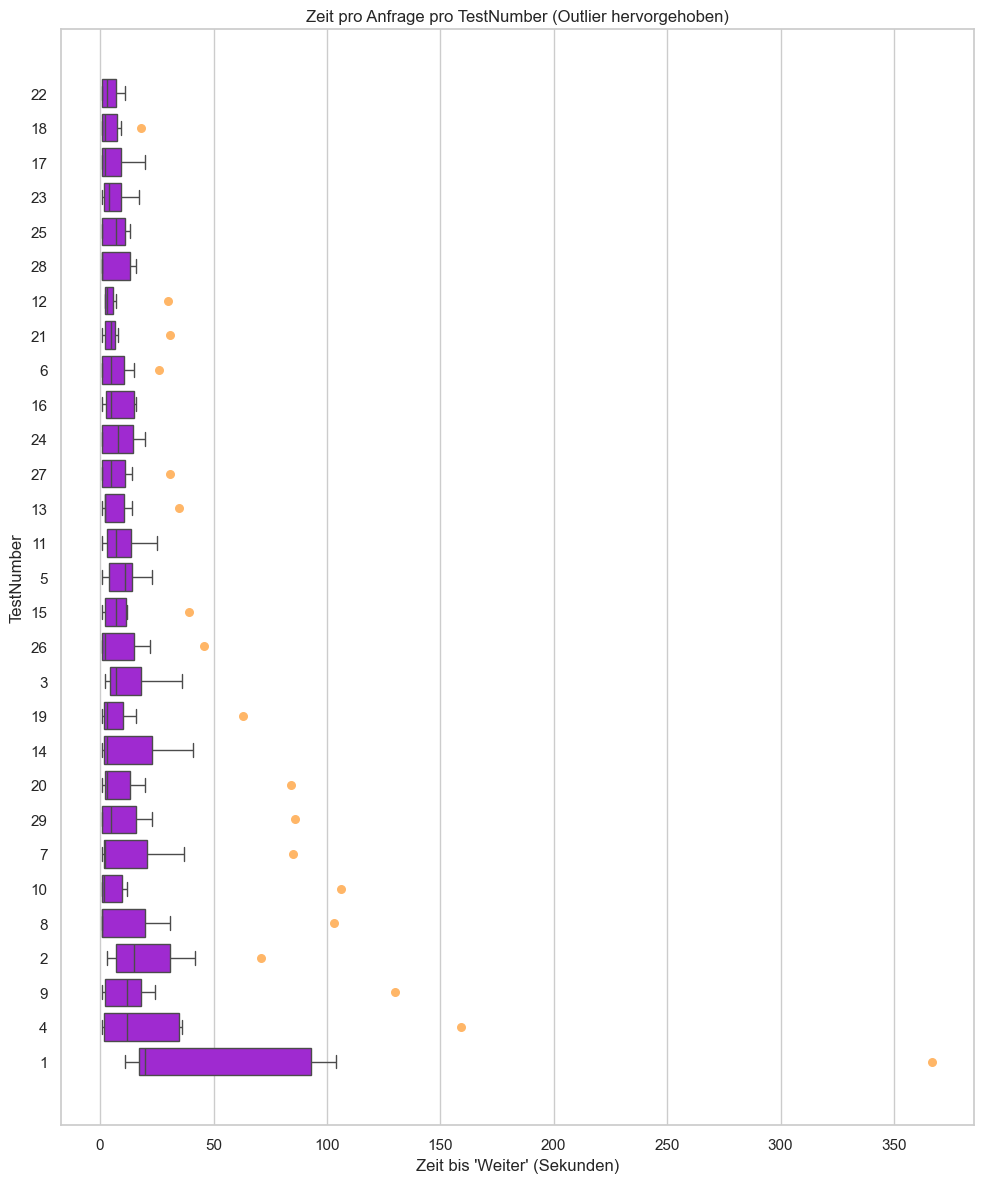

In [29]:
plt.figure(figsize=(10, 12))

sns.boxplot(
    data=summary_flagged,
    x="time_to_weiter_s",
    y="testNumber",
    orient="h",
    order=order,
    showfliers=False  # Wir blenden die Standard-Fliers aus
)

# Mapping testNumber → y-Position im Plot
y_pos = {tn: i for i, tn in enumerate(order)}

outliers = summary_flagged[summary_flagged["is_outlier"]]

# Scatter: x = Zeit, y = Position der entsprechenden testNumber
plt.scatter(
    outliers["time_to_weiter_s"],
    outliers["testNumber"].map(y_pos),
    marker="o",
    s=30,   # Punktgröße
)

plt.xlabel("Zeit bis 'Weiter' (Sekunden)")
plt.ylabel("TestNumber")
plt.title("Zeit pro Anfrage pro TestNumber (Outlier hervorgehoben)")
plt.tight_layout()
plt.show()

### test request tabke

In [30]:
requestsDf = pd.read_json("./snapshot_content-octopus-668_1763739038440106453/testRequests/documents.jsonl", lines=True)
requestsDf.head()

,_creationTime,_id,actions_taken,actual_priority,actual_request_type_prediction,actual_summary,actual_translated_summary,corrected_transcription,datetime,explanation,...,patient_response,priority,request_type_prediction,scenario,summary,transcription,transcription_language,translated_summary,translated_transcription,type
0,1.761322e+12,md70qcfmvthty8dm29pdjr37897t3xhk,Glas Wasser gebracht.,low,care request,,,Darf ich noch einen Schluck Wasser? Mein Mund ...,2024-01-01 03:36:48,"<p class=""text-node""><strong>Grundlage</strong...",...,"Patient bedankt sich, Zufriedenheit gezeigt.",high,care request,"<p class=""text-node"">Sie betreten den Raum von...",The patient requests more water due to a dry m...,Darf ich noch einen Schluck Wasser? Mein Mund ...,German,Der Patient bittet um mehr Wasser wegen eines ...,May I have another sip of water? My mouth is d...,Getränk oder Essen erbeten
1,1.761322e+12,md7253pe8fpctvdzvzdd57hywd7t3mb9,"Medikament verabreicht, Wasser bereitgestellt,...",medium,care request,The patient is experiencing stomach pain after...,Der Patient hat nach dem Essen von zu viel Bau...,Je crois que mon ventre va exploser. Pouvez-vo...,2024-01-01 11:27:50,"<p class=""text-node""><strong>Grundlage</strong...",...,"Patientin bedankt sich, Schmerzintensität nach...",high,emergency request,"<p class=""text-node"">Sie betreten das Zimmer v...",The patient is experiencing severe stomach pai...,Je crois que mon ventre va exploser. Pouvez-vo...,French,Der Patient hat starke Bauchschmerzen und bitt...,I think my stomach is going to explode. Can yo...,Medikament angefordert (Schmerz/Übelkeit)
2,1.761322e+12,md72pt0v3nc5jn7fafat9m4wex7t2kv8,"Patient zur Toilette begleitet, Unterstützung ...",NaN,NaN,,,"Ich müsste mal zur Toilette, aber allein schaf...",2024-01-01 05:23:28,"<p class=""text-node""><strong>Grundlage</strong...",...,"Patient bedankt sich, zufrieden nach Hilfe bei...",low,care request,"<p class=""text-node"">Sie betreten den Raum von...",The patient needs assistance to use the restroom.,"Ich müsste mal zur Toilette, aber allein schaf...",German,"Der Patient benötigt Hilfe, um die Toilette zu...","I need to go to the toilet, but I can't manage...",Medikament angefordert
3,1.761322e+12,md72v3p3s2vse9x0w1j49yz8bh7t20zx,"Pflegekraft informiert über Medikamente, reich...",NaN,NaN,The patient reports stomach pain and requests ...,Der Patient klagt über Bauchschmerzen und bitt...,"Я заболел. Где лекарства, а? Спасибо.",2024-01-01 02:33:02,"<p class=""text-node""><strong>Grundlage</strong...",...,"Patientin bedankt sich, nachdem sie informiert...",medium,care request,"<p class=""text-node"">Sie betreten den Raum von...",The patient is feeling sick and is inquiring a...,"Ихабохве. Битеклайны таблеты, я? Спасибо.",Russian,Der Patient fühlt sich krank und erkundigt sic...,"I am sick. Where are the medicines, huh? Thank...",Medikament angefordert
4,1.761322e+12,md7354kwbre615btftwrnsexns7t2eyx,"Puls gemessen, Herzfrequenz überwacht, Beruhig...",NaN,NaN,,,Est-ce que vous pouvez vérifier encore une foi...,2024-01-01 21:19:09,"<p class=""text-node""><strong>Grundlage</strong...",...,"Patientin bedankt sich, Herzschlag nach 10 Min...",high,emergency request,"<p class=""text-node"">Sie betreten den Raum von...",The patient feels that their heart is beating ...,Est-ce que vous pouvez vérifier encore une foi...,French,"Der Patient fühlt, dass sein Herz schneller al...",Can you check one more time? I think my heart ...,Vitalzeichenkontrolle


In [31]:
rcr_merged = summary_flagged.merge(
    requestsDf[["id", "mistake"]],
    left_on="testNumber",
    right_on="id",
    how="left")

rcr_merged.head()

,progressId,testNumber,time_to_weiter_s,explanation_clicked,explanation_click_time_s,explanation_rating,is_outlier,id,mistake
0,m97022t2bhh6nys0ngcqn7e9zd7vmagc,1,18,False,NaN,None,False,1,correct
1,m97022t2bhh6nys0ngcqn7e9zd7vmagc,2,15,False,NaN,None,False,2,correct
2,m97022t2bhh6nys0ngcqn7e9zd7vmagc,3,2,False,NaN,None,False,3,minor
3,m97022t2bhh6nys0ngcqn7e9zd7vmagc,4,1,False,NaN,None,False,4,minor
4,m97022t2bhh6nys0ngcqn7e9zd7vmagc,5,2,False,NaN,None,False,5,correct


In [32]:
mistake_time_stats = (
    rcr_merged
    .groupby("mistake")["time_to_weiter_s"]
    .agg(["count", "mean", "median", "std", "min", "max"])
)

print(mistake_time_stats)

         count       mean  median        std  min  max
mistake                                               
correct    126  16.333333     5.0  38.796082    1  367
major       20   7.300000     4.0   8.348337    1   35
minor       55  15.636364     5.0  28.007515    1  159


/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/296495990.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers)


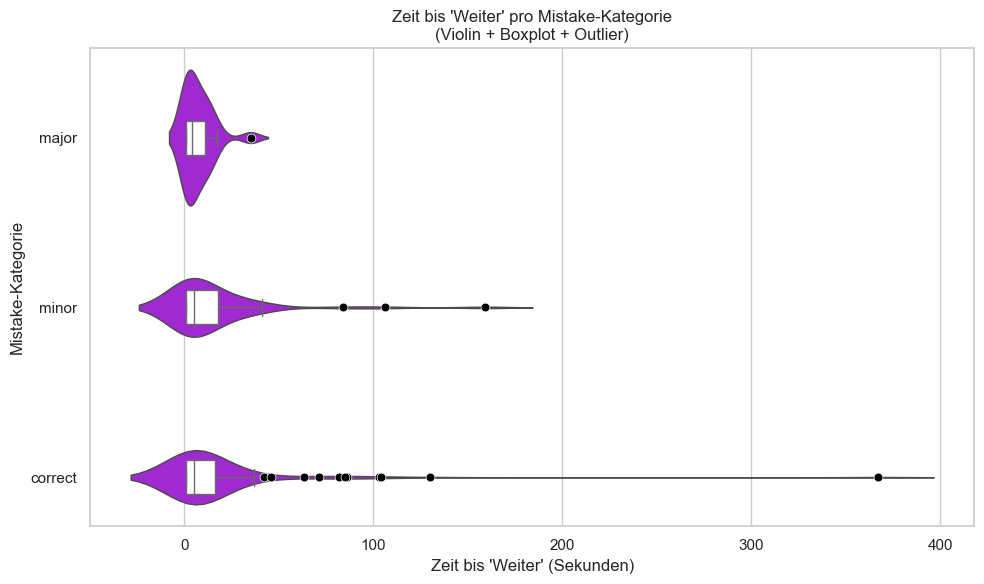

In [33]:
def flag_outliers(group):
    x = group["time_to_weiter_s"]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    group = group.copy()
    group["is_outlier"] = (x < lower) | (x > upper)
    return group

df_plot = (
    rcr_merged
    .dropna(subset=["time_to_weiter_s"])
    .groupby("mistake", group_keys=False)
    .apply(flag_outliers)
)

order = (
    df_plot.groupby("mistake")["time_to_weiter_s"]
    .mean()
    .sort_values()
    .index
)


plt.figure(figsize=(10, 6))

# ---- Violinplot (Verteilung) ----
sns.violinplot(
    data=df_plot,
    x="time_to_weiter_s",
    y="mistake",
    order=order,
    orient="h",
    inner=None,     # Box wird separat gezeichnet
    linewidth=1
)

# ---- Boxplot darüber ----
sns.boxplot(
    data=df_plot,
    x="time_to_weiter_s",
    y="mistake",
    order=order,
    orient="h",
    width=0.2,
    showcaps=True,
    boxprops={'facecolor': 'white', 'zorder': 2},
    showfliers=False,   # Outlier übernehmen wir selbst
    zorder=3
)

# ---- Outlier-Punkte hervorheben ----
outliers = df_plot[df_plot["is_outlier"]]

sns.scatterplot(
    data=outliers,
    x="time_to_weiter_s",
    y="mistake",
    marker="o",
    s=40,
    color="black",
    edgecolor="white",
    zorder=5
)

plt.xlabel("Zeit bis 'Weiter' (Sekunden)")
plt.ylabel("Mistake-Kategorie")
plt.title("Zeit bis 'Weiter' pro Mistake-Kategorie\n(Violin + Boxplot + Outlier)")

plt.tight_layout()
plt.show()

In [34]:
correct_times = rcr_merged[rcr_merged["mistake"] == "correct"]["time_to_weiter_s"].dropna()
minor_times   = rcr_merged[rcr_merged["mistake"] == "minor"]["time_to_weiter_s"].dropna()
major_times   = rcr_merged[rcr_merged["mistake"] == "major"]["time_to_weiter_s"].dropna()

🧪 Kruskal–Wallis-Test

Method

Der Kruskal–Wallis-Test ist ein nichtparametrisches Verfahren zur Überprüfung, ob mehrere unabhängige Gruppen aus derselben Grundgesamtheit stammen. Er ist besonders geeignet, wenn:
	•	die Daten nicht normalverteilt sind,
	•	starke Ausreißer vorliegen,
	•	Gruppen ungleiche Varianzen oder unterschiedliche Stichprobengrößen aufweisen.

In dieser Analyse wurde getestet, ob sich die Bearbeitungszeit bis zum Klicken auf „Weiter“ zwischen den drei Fehlertypen (correct, minor, major) signifikant unterscheidet.

Result
	•	H = 0.589
	•	p = 0.745

Interpretation

Der p-Wert liegt deutlich über dem üblichen Signifikanzniveau von 0.05, was bedeutet, dass keine statistisch signifikanten Unterschiede in der Bearbeitungszeit zwischen den drei Fehlerkategorien bestehen.
Die Ergebnisse legen nahe, dass die Art des vom System produzierten Fehlertyps nicht mit der Reaktionszeit der Teilnehmer*innen zusammenhängt.

In [35]:
from scipy.stats import kruskal

h, p = kruskal(correct_times, minor_times, major_times)
print("H =", h)
print("p =", p)

H = 0.5893639639983501
p = 0.7447683995661658


🧪 Effektstärke (η²)

Method

η² (Eta-Squared) gibt an, wie viel Anteil der Gesamtvarianz durch die Gruppenzugehörigkeit erklärt wird.
Bei nichtparametrischen Tests wie Kruskal–Wallis kann eine approximative Effektstärke berechnet werden:
	•	0.01 = kleiner Effekt
	•	0.06 = mittlerer Effekt
	•	0.14 = großer Effekt

Result
	•	η² = –0.007

(negative Werte entstehen bei der Approximation und werden als 0 interpretiert)

Interpretation

Die Effektstärke entspricht effektiv 0.00.
Dies bedeutet, dass die Fehlerkategorie praktisch keine Varianz in der Bearbeitungszeit erklärt. Die Unterschiede zwischen den Gruppen sind nicht nur statistisch unsignifikant, sondern auch inhaltlich vernachlässigbar.

In [36]:
N = len(correct_times) + len(minor_times) + len(major_times)
eta_squared = (h - (len([correct_times, minor_times, major_times]) - 1)) / (N - 1)
print("eta² =", eta_squared)

eta² = -0.00705318018000825


🧪 Kendall’s τ (Rankkorrelation)

Method

Kendall’s Tau ist ein nichtparametrisches Maß für die Stärke und Richtung des Zusammenhangs zwischen zwei ordinalen oder kontinuierlichen Variablen.
Hier geprüft:

Gibt es einen Zusammenhang zwischen Fehlerkategorie (ordinal: correct < minor < major) und Bearbeitungszeit?

Result
	•	τ = –0.023
	•	p = 0.742

Interpretation

Der Koeffizient liegt extrem nahe bei 0, und der p-Wert zeigt klar, dass der beobachtete Wert nicht signifikant ist.
Dies bedeutet, dass kein monotones Zusammenhangsmuster zwischen der Fehlerschwere und der bearbeiteten Zeit existiert.

In [37]:
from scipy.stats import kendalltau, spearmanr

# mistake als ordinaler code
rcr_merged["mistake_code"] = rcr_merged["mistake"].map({"correct":0, "minor":1, "major":2})

kendalltau(rcr_merged["mistake_code"], rcr_merged["time_to_weiter_s"])
spearmanr(rcr_merged["mistake_code"], rcr_merged["time_to_weiter_s"])

SignificanceResult(statistic=np.float64(-0.023338691238412836), pvalue=np.float64(0.742258322402678))

In [38]:
just_error_requests = requestsDf[["id", "mistake"]]
just_error_requests.head()

,id,mistake
0,15,minor
1,6,minor
2,12,correct
3,3,minor
4,5,correct


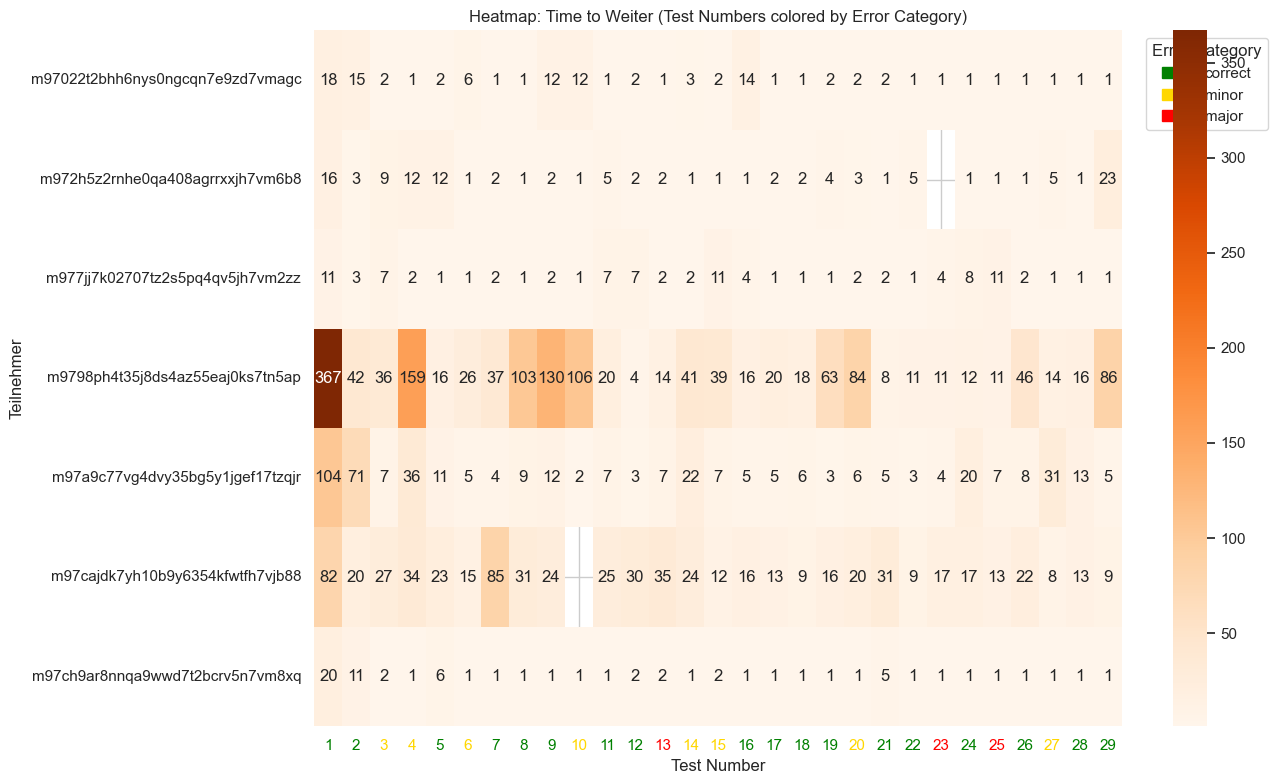

In [39]:
# 1. Pivot the data to get it into the right shape for a heatmap
# Rows = progressId, Columns = testNumber, Values = time_to_save_doc_s
# We use pivot_table to handle potential duplicate entries safely (defaulting to mean)
import matplotlib.patches as mpatches
heat_df = pd.merge(summary_flagged, just_error_requests, left_on="testNumber", right_on="id", how="left")


heatmap_data = heat_df.pivot_table(
    index='progressId', 
    columns='testNumber', 
    values='time_to_weiter_s'
)

category_labels = {
    "correct": "green",
    "minor": "gold",
    "major": "red"
}


# --- 3. Create the plot ---
fig, ax = plt.subplots(figsize=(15, 8))
# Use a colormap that doesn't clash too much with your label colors
sns.heatmap(heatmap_data, annot=True, cmap="Oranges", fmt='g', ax=ax)

# --- 4. Color the x-axis labels ---
# First, get the ordered list of categories matching the columns in the heatmap
ordered_categories = []
for tn in heatmap_data.columns:
    # Find the category for this test number from the merged dataframe
    cat = heat_df[heat_df['testNumber'] == tn]['mistake'].iloc[0]
    ordered_categories.append(cat)

# Now, iterate through the x-axis labels and set their color
# ax.get_xticklabels() returns the labels in order from left to right
for i, label in enumerate(ax.get_xticklabels()):
    category = ordered_categories[i]
    color = category_labels.get(category, 'black') # Default to black if category not found
    label.set_color(color)
    # Optional: make important categories bold for extra emphasis
    if category in ['Critical', 'Major']:
        label.set_fontweight('bold')

# --- 5. Add a legend for the colors ---
# Create legend patches manually
legend_patches = [mpatches.Patch(color=color, label=cat) for cat, color in category_labels.items()]
# Place the legend outside the plot to the right
plt.legend(handles=legend_patches, title='Error Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.title('Heatmap: Time to Weiter (Test Numbers colored by Error Category)')
plt.xlabel('Test Number')
plt.ylabel('Teilnehmer')
# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.9, 1])

In [40]:
rcr_merged.groupby("mistake")["explanation_clicked"].sum()

mistake
correct    4
major      0
minor      2
Name: explanation_clicked, dtype: int64

In [41]:
print(rcr_merged.groupby("mistake")["explanation_clicked"].sum())

mistake
correct    4
major      0
minor      2
Name: explanation_clicked, dtype: int64


In [42]:
rcr_merged.groupby("mistake")["explanation_clicked"].count()

mistake
correct    126
major       20
minor       55
Name: explanation_clicked, dtype: int64

In [43]:
explanation_rate = (
    rcr_merged.groupby("mistake")["explanation_clicked"]
    .mean() * 100
)

print(explanation_rate)

mistake
correct    3.174603
major      0.000000
minor      3.636364
Name: explanation_clicked, dtype: float64


In [44]:
summary_expl = (
    rcr_merged
    .groupby("mistake")["explanation_clicked"]
    .agg(
        total_tests="count",
        clicked="sum",
        click_rate=lambda x: x.mean() * 100
    )
)

print(summary_expl)

         total_tests  clicked  click_rate
mistake                                  
correct          126        4    3.174603
major             20        0    0.000000
minor             55        2    3.636364


In [45]:
import scipy.stats as stats
import pandas as pd

contingency = pd.crosstab(rcr_merged["mistake"], rcr_merged["explanation_clicked"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("Chi² =", chi2)
print("p =", p)

Chi² = 0.7115728715728715
p = 0.7006222320948172


Häufigkeit der Nutzung des Explanation-Buttons nach Fehlerkategorie

Die Nutzung des Explanation-Buttons war insgesamt sehr gering. Die Klickraten lagen bei:
	•	correct: 3.17 %
	•	minor: 3.64 %
	•	major: 0 %

Trotz minimaler Unterschiede deutet das Muster darauf hin, dass die Erklärungsfunktion kaum genutzt wurde – unabhängig vom vom System erzeugten Fehlertyp.

⸻

Statistische Analyse: Chi-Quadrat-Unabhängigkeitstest

Um zu prüfen, ob die Nutzung des Explanation-Buttons systematisch mit der Fehlerschwere zusammenhängt, wurde ein Chi-Quadrat-Test der Unabhängigkeit durchgeführt.

Ergebnis:
	•	χ²(2) = 0.71
	•	p = 0.701

Interpretation

Der p-Wert liegt deutlich über dem üblichen Signifikanzniveau von 0.05.
Damit gibt es keinen statistisch bedeutsamen Zusammenhang zwischen Fehlertyp und Wahrscheinlichkeit, dass die Teilnehmenden den Explanation-Button verwenden.

Die extremely geringe Effektstärke (Cramér’s V würde hier < 0.06 liegen) zeigt, dass die Unterschiede in der Klickwahrscheinlichkeit nicht nur statistisch nicht signifikant, sondern auch inhaltlich vernachlässigbar sind.

Fazit

Die Analyse zeigt, dass die Entscheidung, eine Erklärung abzurufen, nicht abhängig von der Fehlerkategorie (correct / minor / major) war.
Teilnehmende nutzten die Erklärungsfunktion selten und nicht häufiger, wenn das System inhaltlich falsch lag.

Dies deutet darauf hin, dass:
	•	Fehler des Systems nicht erkannt wurden,
	•	oder keine Motivation bestand, eine Erklärung abzurufen,
	•	oder die Erklärung bereits vorab als nicht nützlich eingeschätzt wurde.

Rosti mach weitere ergänzugen aus den interviews:
aka einfacher direkt nachzuschauen, zuviel zeit, unnötig

### Dokumentations

In [46]:
# alle relevanten Dokumentationsfelder
doc_fields = [
    "doc-issues-noted",
    "doc-patient-response",
    "doc-actions-taken",
    "doc-priority",
    "doc-type-of-request"
]
def summarize_documentation(group: pd.DataFrame) -> pd.Series:
    test_number = group["testNumber"].iloc[0]
    progress_id = group["progressId"].iloc[0]

    # --- Zeit bis "Dokumentation speichern" ---
    save_rows = group[
        group["content"]
        .fillna("")
        .str.contains("Dokumentation speichern", case=False, na=False)
    ]
    time_to_save = (
        save_rows["elapsedTimeSeconds"].min()
        if not save_rows.empty
        else np.nan
    )

    result = {
        "progressId": progress_id,
        "testNumber": test_number,
        "time_to_save_doc_s": time_to_save,
    }

    # --- Zeitpunkte der Dokumentationsfelder ---
    for field in doc_fields:
        rows = group[group["elementId"] == field]
        if rows.empty:
            result[field + "_time_s"] = None
        else:
            result[field + "_time_s"] = rows["elapsedTimeSeconds"].min()

    return pd.Series(result)

In [47]:
summary_doc = (
    documentation_stage_clicks
    .groupby(["progressId", "testNumber"], as_index=False)
    .apply(summarize_documentation)
)

summary_doc = summary_doc.sort_values(["progressId", "testNumber"])

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/815527760.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(summarize_documentation)


In [48]:
summary_doc.head()

,progressId,testNumber,time_to_save_doc_s,doc-issues-noted_time_s,doc-patient-response_time_s,doc-actions-taken_time_s,doc-priority_time_s,doc-type-of-request_time_s
0,m97022t2bhh6nys0ngcqn7e9zd7vmagc,1,11,None,None,None,NaN,NaN
1,m97022t2bhh6nys0ngcqn7e9zd7vmagc,2,1,None,None,None,NaN,NaN
2,m97022t2bhh6nys0ngcqn7e9zd7vmagc,3,1,None,None,None,NaN,NaN
3,m97022t2bhh6nys0ngcqn7e9zd7vmagc,4,0,None,None,None,NaN,NaN
4,m97022t2bhh6nys0ngcqn7e9zd7vmagc,5,1,None,None,None,NaN,NaN


In [49]:
summary_doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   progressId                   202 non-null    object 
 1   testNumber                   202 non-null    int64  
 2   time_to_save_doc_s           202 non-null    int64  
 3   doc-issues-noted_time_s      0 non-null      object 
 4   doc-patient-response_time_s  0 non-null      object 
 5   doc-actions-taken_time_s     0 non-null      object 
 6   doc-priority_time_s          2 non-null      float64
 7   doc-type-of-request_time_s   1 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.8+ KB


In [50]:
def flag_outliers_doc(group):
    x = group["time_to_save_doc_s"]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    group = group.copy()
    group["is_outlier"] = (x < lower) | (x > upper)
    return group

summary_doc_flagged = (
    summary_doc
    .dropna(subset=["time_to_save_doc_s"])
    .groupby("testNumber", group_keys=False)
    .apply(flag_outliers_doc)
)

/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/949350111.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers_doc)


In [51]:
order = (
    summary_doc_flagged
    .groupby("testNumber")["time_to_save_doc_s"]
    .mean()
    .sort_values()
    .index
)

In [52]:
print(summary_doc_flagged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   progressId                   202 non-null    object 
 1   testNumber                   202 non-null    int64  
 2   time_to_save_doc_s           202 non-null    int64  
 3   doc-issues-noted_time_s      0 non-null      object 
 4   doc-patient-response_time_s  0 non-null      object 
 5   doc-actions-taken_time_s     0 non-null      object 
 6   doc-priority_time_s          2 non-null      float64
 7   doc-type-of-request_time_s   1 non-null      float64
 8   is_outlier                   202 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 22.5+ KB
None


In [53]:
print(summary_doc_flagged.head())

                         progressId  testNumber  time_to_save_doc_s  \
0  m97022t2bhh6nys0ngcqn7e9zd7vmagc           1                  11   
1  m97022t2bhh6nys0ngcqn7e9zd7vmagc           2                   1   
2  m97022t2bhh6nys0ngcqn7e9zd7vmagc           3                   1   
3  m97022t2bhh6nys0ngcqn7e9zd7vmagc           4                   0   
4  m97022t2bhh6nys0ngcqn7e9zd7vmagc           5                   1   

  doc-issues-noted_time_s doc-patient-response_time_s  \
0                    None                        None   
1                    None                        None   
2                    None                        None   
3                    None                        None   
4                    None                        None   

  doc-actions-taken_time_s  doc-priority_time_s  doc-type-of-request_time_s  \
0                     None                  NaN                         NaN   
1                     None                  NaN                         

In [54]:
requestsDf.columns

Index(['_creationTime', '_id', 'actions_taken', 'actual_priority',
       'actual_request_type_prediction', 'actual_summary',
       'actual_translated_summary', 'corrected_transcription', 'datetime',
       'explanation', 'explanation_type', 'id', 'issues_noted', 'mistake',
       'mistake_explanation', 'patient', 'patient_response', 'priority',
       'request_type_prediction', 'scenario', 'summary', 'transcription',
       'transcription_language', 'translated_summary',
       'translated_transcription', 'type'],
      dtype='object')

In [55]:
just_error_requests.mistake.unique()

array(['minor', 'correct', 'major'], dtype=object)

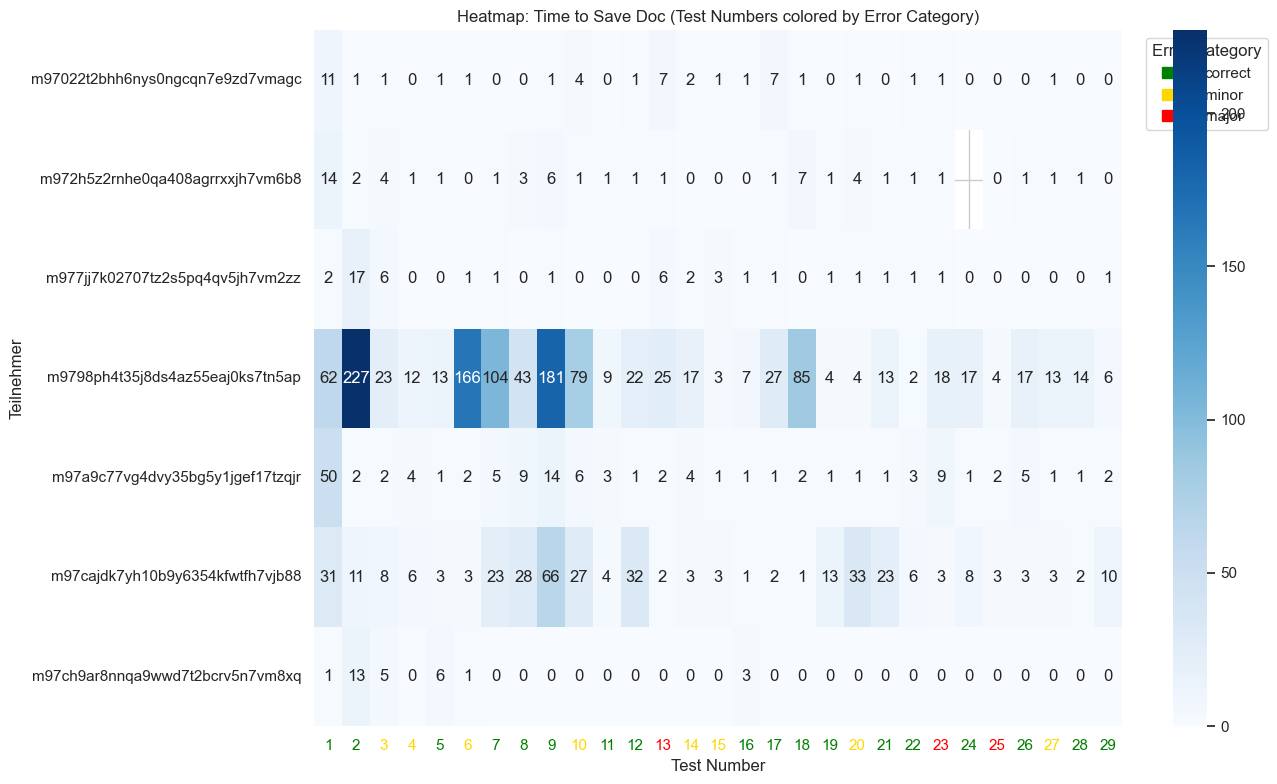

In [56]:
# 1. Pivot the data to get it into the right shape for a heatmap
# Rows = progressId, Columns = testNumber, Values = time_to_save_doc_s
# We use pivot_table to handle potential duplicate entries safely (defaulting to mean)
import matplotlib.patches as mpatches
heat_df = pd.merge(summary_doc_flagged, just_error_requests, left_on="testNumber", right_on="id", how="left")


heatmap_data = heat_df.pivot_table(
    index='progressId', 
    columns='testNumber', 
    values='time_to_save_doc_s'
)

category_labels = {
    "correct": "green",
    "minor": "gold",
    "major": "red"
}


# --- 3. Create the plot ---
fig, ax = plt.subplots(figsize=(15, 8))
# Use a colormap that doesn't clash too much with your label colors
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt='g', ax=ax)

# --- 4. Color the x-axis labels ---
# First, get the ordered list of categories matching the columns in the heatmap
ordered_categories = []
for tn in heatmap_data.columns:
    # Find the category for this test number from the merged dataframe
    cat = heat_df[heat_df['testNumber'] == tn]['mistake'].iloc[0]
    ordered_categories.append(cat)

# Now, iterate through the x-axis labels and set their color
# ax.get_xticklabels() returns the labels in order from left to right
for i, label in enumerate(ax.get_xticklabels()):
    category = ordered_categories[i]
    color = category_labels.get(category, 'black') # Default to black if category not found
    label.set_color(color)
    # Optional: make important categories bold for extra emphasis
    if category in ['Critical', 'Major']:
        label.set_fontweight('bold')

# --- 5. Add a legend for the colors ---
# Create legend patches manually
legend_patches = [mpatches.Patch(color=color, label=cat) for cat, color in category_labels.items()]
# Place the legend outside the plot to the right
plt.legend(handles=legend_patches, title='Error Category', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.title('Heatmap: Time to Save Doc (Test Numbers colored by Error Category)')
plt.xlabel('Test Number')
plt.ylabel('Teilnehmer')
# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()

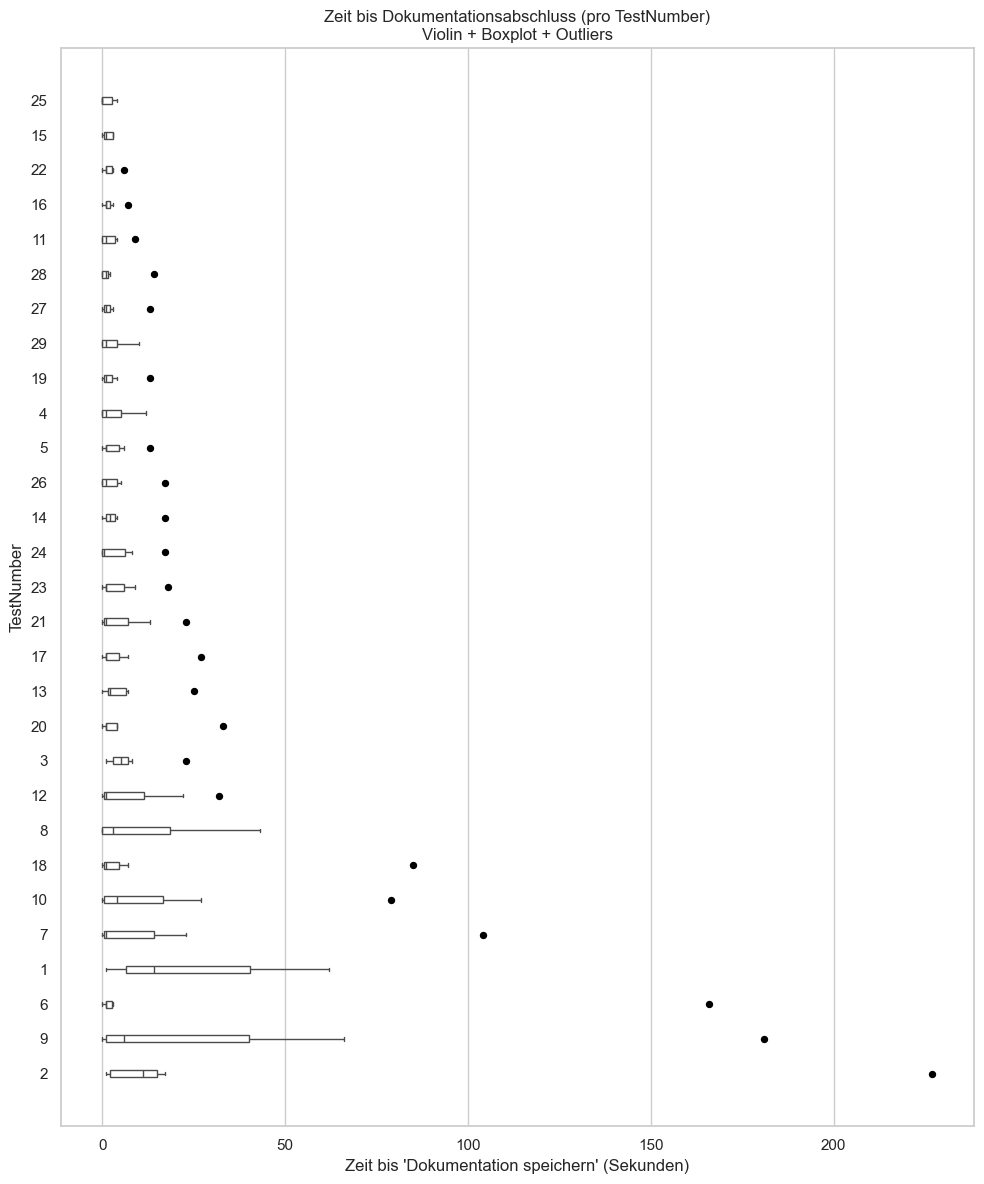

In [57]:

plt.figure(figsize=(10, 12))


# Boxplot darüber
sns.boxplot(
    data=summary_doc_flagged,
    x="time_to_save_doc_s",
    y="testNumber",
    order=order,
    orient="h",
    width=0.2,
    showcaps=True,
    showfliers=False,
    boxprops={"facecolor": "white", "zorder": 2},
    zorder=3
)

# Outlier hervorheben
outliers = summary_doc_flagged[summary_doc_flagged["is_outlier"]].copy()

# Mapping testNumber → kaegorische y-Position
y_pos = {tn: i for i, tn in enumerate(order)}
outliers["y_mapped"] = outliers["testNumber"].map(y_pos)

plt.scatter(
    outliers["time_to_save_doc_s"],
    outliers["y_mapped"],
    color="black",
    s=40,
    edgecolor="white",
    zorder=5
)

plt.xlabel("Zeit bis 'Dokumentation speichern' (Sekunden)")
plt.ylabel("TestNumber")
plt.title("Zeit bis Dokumentationsabschluss (pro TestNumber)\nViolin + Boxplot + Outliers")

plt.tight_layout()
plt.show()

In [58]:
dcr_merged = summary_doc_flagged.merge(
    requestsDf[["id", "mistake"]],
    left_on="testNumber",
    right_on="id",
    how="left")

dcr_merged.head()

,progressId,testNumber,time_to_save_doc_s,doc-issues-noted_time_s,doc-patient-response_time_s,doc-actions-taken_time_s,doc-priority_time_s,doc-type-of-request_time_s,is_outlier,id,mistake
0,m97022t2bhh6nys0ngcqn7e9zd7vmagc,1,11,None,None,None,NaN,NaN,False,1,correct
1,m97022t2bhh6nys0ngcqn7e9zd7vmagc,2,1,None,None,None,NaN,NaN,False,2,correct
2,m97022t2bhh6nys0ngcqn7e9zd7vmagc,3,1,None,None,None,NaN,NaN,False,3,minor
3,m97022t2bhh6nys0ngcqn7e9zd7vmagc,4,0,None,None,None,NaN,NaN,False,4,minor
4,m97022t2bhh6nys0ngcqn7e9zd7vmagc,5,1,None,None,None,NaN,NaN,False,5,correct


In [59]:
mistake_time_stats = (
    dcr_merged
    .groupby("mistake")["time_to_save_doc_s"]
    .agg(["count", "mean", "median", "std", "min", "max"])
)

print(mistake_time_stats)

         count       mean  median        std  min  max
mistake                                               
correct    125  10.720000     1.0  29.614349    0  227
major       21   4.047619     2.0   6.406842    0   25
minor       56   8.303571     2.0  24.591883    0  166


/var/folders/cj/5k6rp6_550g0qp5ksxrt8xn80000gn/T/ipykernel_42245/149403954.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers)


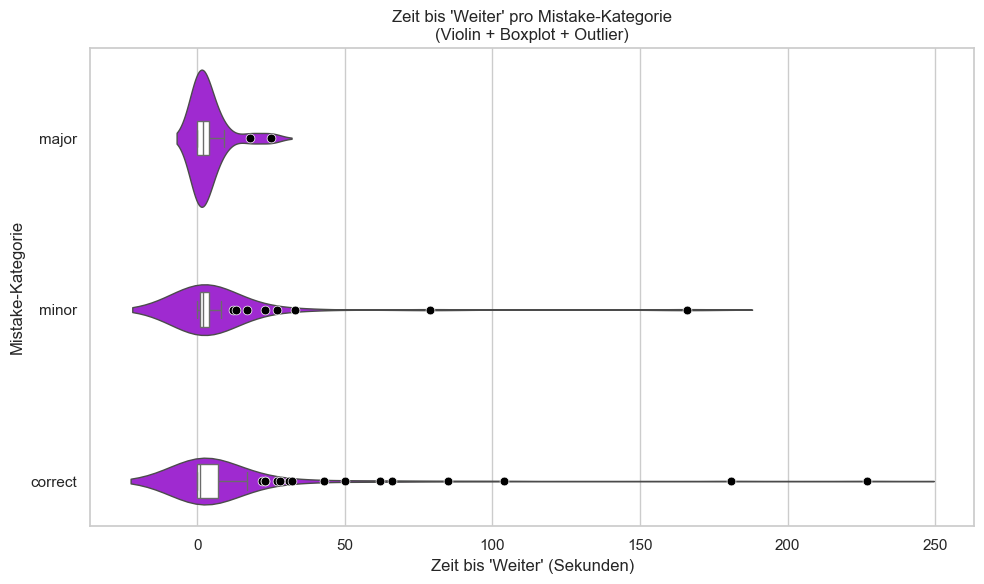

In [60]:
def flag_outliers(group):
    x = group["time_to_save_doc_s"]
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    group = group.copy()
    group["is_outlier"] = (x < lower) | (x > upper)
    return group

df_plot = (
    dcr_merged
    .dropna(subset=["time_to_save_doc_s"])
    .groupby("mistake", group_keys=False)
    .apply(flag_outliers)
)

order = (
    df_plot.groupby("mistake")["time_to_save_doc_s"]
    .mean()
    .sort_values()
    .index
)


plt.figure(figsize=(10, 6))

# ---- Violinplot (Verteilung) ----
sns.violinplot(
    data=df_plot,
    x="time_to_save_doc_s",
    y="mistake",
    order=order,
    orient="h",
    inner=None,     # Box wird separat gezeichnet
    linewidth=1
)

# ---- Boxplot darüber ----
sns.boxplot(
    data=df_plot,
    x="time_to_save_doc_s",
    y="mistake",
    order=order,
    orient="h",
    width=0.2,
    showcaps=True,
    boxprops={'facecolor': 'white', 'zorder': 2},
    showfliers=False,   # Outlier übernehmen wir selbst
    zorder=3
)

# ---- Outlier-Punkte hervorheben ----
outliers = df_plot[df_plot["is_outlier"]]

sns.scatterplot(
    data=outliers,
    x="time_to_save_doc_s",
    y="mistake",
    marker="o",
    s=40,
    color="black",
    edgecolor="white",
    zorder=5
)

plt.xlabel("Zeit bis 'Weiter' (Sekunden)")
plt.ylabel("Mistake-Kategorie")
plt.title("Zeit bis 'Weiter' pro Mistake-Kategorie\n(Violin + Boxplot + Outlier)")

plt.tight_layout()
plt.show()

In [61]:
correct_times = dcr_merged[dcr_merged["mistake"] == "correct"]["time_to_save_doc_s"].dropna()
minor_times   = dcr_merged[dcr_merged["mistake"] == "minor"]["time_to_save_doc_s"].dropna()
major_times   = dcr_merged[dcr_merged["mistake"] == "major"]["time_to_save_doc_s"].dropna()

🧪 Kruskal–Wallis-Test

Method

Der Kruskal–Wallis-Test ist ein nichtparametrisches Verfahren zur Überprüfung, ob mehrere unabhängige Gruppen aus derselben Grundgesamtheit stammen. Er ist besonders geeignet, wenn:
	•	die Daten nicht normalverteilt sind,
	•	starke Ausreißer vorliegen,
	•	Gruppen ungleiche Varianzen oder unterschiedliche Stichprobengrößen aufweisen.

In dieser Analyse wurde getestet, ob sich die Bearbeitungszeit bis zum Klicken auf „Weiter“ zwischen den drei Fehlertypen (correct, minor, major) signifikant unterscheidet.

Result
	•	H = 0.119
	•	p = 0.942

Interpretation

Der p-Wert liegt deutlich über dem üblichen Signifikanzniveau von 0.05, was bedeutet, dass keine statistisch signifikanten Unterschiede in der Bearbeitungszeit zwischen den drei Fehlerkategorien bestehen.
Die Ergebnisse legen nahe, dass die Art des vom System produzierten Fehlertyps nicht mit der Reaktionszeit der Teilnehmer*innen zusammenhängt.

In [62]:
from scipy.stats import kruskal

h, p = kruskal(correct_times, minor_times, major_times)
print("H =", h)
print("p =", p)

H = 0.11901467972752988
p = 0.9422286177361597


🧪 Effektstärke (η²)

Method

η² (Eta-Squared) gibt an, wie viel Anteil der Gesamtvarianz durch die Gruppenzugehörigkeit erklärt wird.
Bei nichtparametrischen Tests wie Kruskal–Wallis kann eine approximative Effektstärke berechnet werden:
	•	0.01 = kleiner Effekt
	•	0.06 = mittlerer Effekt
	•	0.14 = großer Effekt

Result
	•	η² = –0.009

(negative Werte entstehen bei der Approximation und werden als 0 interpretiert)

Interpretation

Die Effektstärke entspricht effektiv 0.00.
Dies bedeutet, dass die Fehlerkategorie praktisch keine Varianz in der Bearbeitungszeit erklärt. Die Unterschiede zwischen den Gruppen sind nicht nur statistisch unsignifikant, sondern auch inhaltlich vernachlässigbar.

In [63]:
N = len(correct_times) + len(minor_times) + len(major_times)
eta_squared = (h - (len([correct_times, minor_times, major_times]) - 1)) / (N - 1)
print("eta² =", eta_squared)

eta² = -0.009358135921753583


🧪 Kendall’s τ – Rangkorrelation

Method

Kendall’s τ misst die Stärke und Richtung eines monotonicen Zusammenhangs zwischen zwei Variablen.
Hier wurde getestet, ob die Zeit bis „Dokumentation speichern“ systematisch mit der Fehlerschwere zusammenhängt (codiert als correct < minor < major).

Result
	•	τ = −0.0046
	•	p = 0.948

Interpretation

Der Koeffizient liegt praktisch bei 0, und der p-Wert zeigt, dass der gefundene Wert nicht signifikant ist.
Es besteht kein statistischer Zusammenhang zwischen der Bearbeitungszeit in der Dokumentationsphase und der Fehlerkategorie.
Mit anderen Worten:

Die Dauer, die Teilnehmende für die Dokumentationsphase benötigen, hängt nicht davon ab, ob das System später einen correct-, minor- oder major-Fehler klassifiziert.

In [64]:
from scipy.stats import kendalltau, spearmanr

# mistake als ordinaler code
dcr_merged["mistake_code"] = dcr_merged["mistake"].map({"correct":0, "minor":1, "major":2})

kendalltau(dcr_merged["mistake_code"], dcr_merged["time_to_save_doc_s"])
spearmanr(dcr_merged["mistake_code"], dcr_merged["time_to_save_doc_s"])



SignificanceResult(statistic=np.float64(-0.004609606550658678), pvalue=np.float64(0.9480875401852551))

In [65]:
print(dcr_merged.head())

                         progressId  testNumber  time_to_save_doc_s  \
0  m97022t2bhh6nys0ngcqn7e9zd7vmagc           1                  11   
1  m97022t2bhh6nys0ngcqn7e9zd7vmagc           2                   1   
2  m97022t2bhh6nys0ngcqn7e9zd7vmagc           3                   1   
3  m97022t2bhh6nys0ngcqn7e9zd7vmagc           4                   0   
4  m97022t2bhh6nys0ngcqn7e9zd7vmagc           5                   1   

  doc-issues-noted_time_s doc-patient-response_time_s  \
0                    None                        None   
1                    None                        None   
2                    None                        None   
3                    None                        None   
4                    None                        None   

  doc-actions-taken_time_s  doc-priority_time_s  doc-type-of-request_time_s  \
0                     None                  NaN                         NaN   
1                     None                  NaN                         

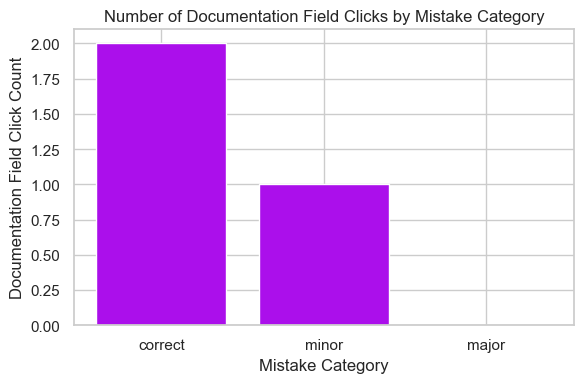

In [66]:
doc_fields = [
    "doc-issues-noted_time_s",
    "doc-patient-response_time_s",
    "doc-actions-taken_time_s",
    "doc-priority_time_s",
    "doc-type-of-request_time_s"
]

df = dcr_merged.copy()

# Boolean: wurde eines der Dokumentationsfelder angeklickt?
df["doc_clicked"] = df[doc_fields].notna().any(axis=1)

# Klicks pro Fehlerkategorie zählen
click_counts = df.groupby("mistake")["doc_clicked"].sum().reindex(["correct","minor","major"]).fillna(0)

# Plot
plt.figure(figsize=(6,4))
plt.bar(click_counts.index, click_counts.values)
plt.xlabel("Mistake Category")
plt.ylabel("Documentation Field Click Count")
plt.title("Number of Documentation Field Clicks by Mistake Category")
plt.tight_layout()
plt.show()

Formatting for apendix

In [67]:
!pip install tabulate

In [71]:
print(clicks.head().to_markdown(index=False))

|   _creationTime | _id                              | content                 |   elapsedTimeSeconds | elementId       | progressId                       |   testNumber | testSubStage   | timestamp                  |
|----------------:|:---------------------------------|:------------------------|---------------------:|:----------------|:---------------------------------|-------------:|:---------------|:---------------------------|
|     1.76337e+12 | m1700vdmc2p66rq9tj67ssash17vjwr7 | Dokumentation speichern |                   11 | continue-button | m97cajdk7yh10b9y6354kfwtfh7vjb88 |            2 | documentation  | 2025-11-17 10:15:17.539000 |
|     1.76338e+12 | m1703v2bzmckd12t3rpamjtpah7vjgaq | Dokumentation speichern |                   77 | continue-button | m97cajdk7yh10b9y6354kfwtfh7vjb88 |            9 | documentation  | 2025-11-17 10:24:38.601000 |
|     1.76347e+12 | m17043zxsrf3vpskas5mvkvs9x7vnget | Dokumentation speichern |                    0 | continue-button | m972aw

In [69]:
clicks.to_json("./testClicks_cleaned.json", orient="records")

In [70]:
pre_survey.to_json("./preSurvey_cleaned.json", orient="records")

In [ ]:
print(post_survey.to_markdown(index=False))

|   _creationTime | _id                              |   anxietyDiminishSkills |   anxietyLessPersonal |   anxietyUneasyWithAIDecisions |   compareToOtherMethods |   easyTask |   easyToLearn |   feedbackImproveConfidence |   fxdCorrectionsUsefulSignal |   fxdDocEditsNatural |   fxdNotTimeConsuming |   fxeActionEasy |   fxeExplanationClearHelpful |   fxeSimpleRatingConvenient |   helpToLean |   interactionEase |   interfaceLowMentalEffort |   noTaskDisruption |   productivityIncrease | progressId                       |   systemUsability |   trustConfidenceInfo |   trustDependOnPrioritisation |   trustReliability |   usefulness |   workSupport |   workflowFitNatural |   workflowPaceManageable |
|----------------:|:---------------------------------|------------------------:|----------------------:|-------------------------------:|------------------------:|-----------:|--------------:|----------------------------:|-----------------------------:|---------------------:|---------------------

In [74]:
print(post_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _creationTime                 7 non-null      float64
 1   _id                           7 non-null      object 
 2   anxietyDiminishSkills         7 non-null      int64  
 3   anxietyLessPersonal           7 non-null      int64  
 4   anxietyUneasyWithAIDecisions  7 non-null      int64  
 5   compareToOtherMethods         7 non-null      int64  
 6   easyTask                      7 non-null      int64  
 7   easyToLearn                   7 non-null      int64  
 8   feedbackImproveConfidence     7 non-null      int64  
 9   fxdCorrectionsUsefulSignal    7 non-null      int64  
 10  fxdDocEditsNatural            7 non-null      int64  
 11  fxdNotTimeConsuming           7 non-null      int64  
 12  fxeActionEasy                 7 non-null      int64  
 13  fxeExplan

In [75]:
column_mapping = {
    # --- Section 2: PEoU ( inferred sequence ) ---
    'interactionEase': '2.1',
    'systemUsability': '2.2',
    'easyToLearn': '2.3',
    'helpToLean': '2.4', # Note: Matches your schema spelling "Lean"

    # --- Section 3: PU ( inferred sequence ) ---
    'workSupport': '3.1',
    'productivityIncrease': '3.2',
    'usefulness': '3.3',
    'compareToOtherMethods': '3.4',
    'easyTask': '3.5',

    # --- Section 4: Trust, Anxiety, Workflow ( explicit // 4.x ) ---
    'trustConfidenceInfo': '4.1',
    'trustReliability': '4.2',
    'trustDependOnPrioritisation': '4.3',
    'anxietyLessPersonal': '4.4',
    'anxietyUneasyWithAIDecisions': '4.5',
    'anxietyDiminishSkills': '4.6',
    'workflowFitNatural': '4.7',
    'workflowPaceManageable': '4.8',
    'interfaceLowMentalEffort': '4.9',
    'noTaskDisruption': '4.10',

    # --- Section 5: Feedback Mechanisms ( explicit // 5.x ) ---
    'fxeActionEasy': '5.1',
    'fxeExplanationClearHelpful': '5.2',
    'fxeSimpleRatingConvenient': '5.3',
    'fxdDocEditsNatural': '5.4',
    'fxdNotTimeConsuming': '5.5',
    'fxdCorrectionsUsefulSignal': '5.6',
    'feedbackImproveConfidence': '5.7'
}
post_survey_renamed = post_survey.rename(columns=column_mapping)
print(post_survey_renamed.head())

   _creationTime                               _id  4.6  4.4  4.5  3.4  3.5  \
0   1.762528e+12  kd73p9ftbs21be8g4ffycxad3n7tz27r    2    1    2    5    5   
1   1.762090e+12  kd751k0dcpw9pcnvr19n1tjbpx7tnzzz    2    1    2    4    4   
2   1.763376e+12  kd75gw2d360mbqz94p75ek6nbh7vjd6r    1    1    1    3    3   
3   1.763466e+12  kd75shretf42q9p042v2es4v3s7vmtb3    3    2    2    5    5   
4   1.763466e+12  kd76yn1xjgx6xkrmrx0fyy6d817vn74w    5    4    5    3    5   

   2.3  5.7  5.6  ...  3.2                        progressId  2.2  4.1  4.3  \
0    5    5    4  ...    5  m97a9c77vg4dvy35bg5y1jgef17tzqjr    5    4    3   
1    4    5    4  ...    3  m9798ph4t35j8ds4az55eaj0ks7tn5ap    5    3    4   
2    5    3    3  ...    3  m97cajdk7yh10b9y6354kfwtfh7vjb88    5    4    3   
3    4    4    4  ...    5  m977jj7k02707tz2s5pq4qv5jh7vm2zz    4    5    4   
4    5    5    5  ...    5  m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq    5    5    5   

   4.2  3.3  3.1  4.7  4.8  
0    5    5    5    5

In [76]:
# drop _id and _creationTime columns
post_survey_renamed = post_survey_renamed.drop(columns=["_id", "_creationTime"])
print(post_survey_renamed.head())

   4.6  4.4  4.5  3.4  3.5  2.3  5.7  5.6  5.4  5.5  ...  3.2  \
0    2    1    2    5    5    5    5    4    4    4  ...    5   
1    2    1    2    4    4    4    5    4    4    4  ...    3   
2    1    1    1    3    3    5    3    3    4    3  ...    3   
3    3    2    2    5    5    4    4    4    4    5  ...    5   
4    5    4    5    3    5    5    5    5    5    5  ...    5   

                         progressId  2.2  4.1  4.3  4.2  3.3  3.1 4.7  4.8  
0  m97a9c77vg4dvy35bg5y1jgef17tzqjr    5    4    3    5    5    5   5    5  
1  m9798ph4t35j8ds4az55eaj0ks7tn5ap    5    3    4    4    4    3   4    4  
2  m97cajdk7yh10b9y6354kfwtfh7vjb88    5    4    3    3    4    4   4    5  
3  m977jj7k02707tz2s5pq4qv5jh7vm2zz    4    5    4    4    5    4   3    4  
4  m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq    5    5    5    5    5    5   5    5  

[5 rows x 27 columns]


In [77]:
# rename progressId to participant
post_survey_renamed = post_survey_renamed.rename(columns={"progressId": "participant"})
print(post_survey_renamed.head())

   4.6  4.4  4.5  3.4  3.5  2.3  5.7  5.6  5.4  5.5  ...  3.2  \
0    2    1    2    5    5    5    5    4    4    4  ...    5   
1    2    1    2    4    4    4    5    4    4    4  ...    3   
2    1    1    1    3    3    5    3    3    4    3  ...    3   
3    3    2    2    5    5    4    4    4    4    5  ...    5   
4    5    4    5    3    5    5    5    5    5    5  ...    5   

                        participant  2.2  4.1  4.3  4.2  3.3  3.1 4.7  4.8  
0  m97a9c77vg4dvy35bg5y1jgef17tzqjr    5    4    3    5    5    5   5    5  
1  m9798ph4t35j8ds4az55eaj0ks7tn5ap    5    3    4    4    4    3   4    4  
2  m97cajdk7yh10b9y6354kfwtfh7vjb88    5    4    3    3    4    4   4    5  
3  m977jj7k02707tz2s5pq4qv5jh7vm2zz    4    5    4    4    5    4   3    4  
4  m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq    5    5    5    5    5    5   5    5  

[5 rows x 27 columns]


In [83]:
# sort columns alphabetically except participant first
cols = post_survey_renamed.columns.tolist()
cols.remove("participant")
cols = ["participant"] + sorted(cols)
post_survey_renamed = post_survey_renamed[cols]
print(post_survey_renamed.head())

                        participant  2.1  2.2  2.3  2.4  3.1  3.2  3.3  3.4  \
0  m97a9c77vg4dvy35bg5y1jgef17tzqjr    5    5    5    4    5    5    5    5   
1  m9798ph4t35j8ds4az55eaj0ks7tn5ap    5    5    4    5    3    3    4    4   
2  m97cajdk7yh10b9y6354kfwtfh7vjb88    5    5    5    1    4    3    4    3   
3  m977jj7k02707tz2s5pq4qv5jh7vm2zz    4    4    4    2    4    5    5    5   
4  m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq    5    5    5    1    5    5    5    3   

   3.5  ...  4.7  4.8  4.9  5.1  5.2  5.3  5.4  5.5  5.6  5.7  
0    5  ...    5    5    5    5    5    4    4    4    4    5  
1    4  ...    4    4    5    4    4    5    4    4    4    5  
2    3  ...    4    5    5    3    5    3    4    3    3    3  
3    5  ...    3    4    4    5    5    4    4    5    4    4  
4    5  ...    5    5    5    5    4    5    5    5    5    5  

[5 rows x 27 columns]


In [87]:
# flip columns and rows and remove participant as index
post_survey_final = post_survey_renamed.set_index("participant").T.reset_index()
post_survey_final = post_survey_final.rename(columns={"index": "question"})
# drop participant column

post_survey_final

participant,question,m97a9c77vg4dvy35bg5y1jgef17tzqjr,m9798ph4t35j8ds4az55eaj0ks7tn5ap,m97cajdk7yh10b9y6354kfwtfh7vjb88,m977jj7k02707tz2s5pq4qv5jh7vm2zz,m97ch9ar8nnqa9wwd7t2bcrv5n7vm8xq,m972h5z2rnhe0qa408agrrxxjh7vm6b8,m97022t2bhh6nys0ngcqn7e9zd7vmagc
0,2.1,5,5,5,4,5,5,3
1,2.2,5,5,5,4,5,5,3
2,2.3,5,4,5,4,5,5,3
3,2.4,4,5,1,2,1,1,3
4,3.1,5,3,4,4,5,5,3
5,3.2,5,3,3,5,5,4,3
6,3.3,5,4,4,5,5,5,3
7,3.4,5,4,3,5,3,5,3
8,3.5,5,4,3,5,5,4,3
9,4.1,4,3,4,5,5,4,3


In [79]:
print(post_survey_renamed.to_markdown(index=False))

| participant                      |   2.1 |   2.2 |   2.3 |   2.4 |   3.1 |   3.2 |   3.3 |   3.4 |   3.5 |   4.1 |   4.10 |   4.2 |   4.3 |   4.4 |   4.5 |   4.6 |   4.7 |   4.8 |   4.9 |   5.1 |   5.2 |   5.3 |   5.4 |   5.5 |   5.6 |   5.7 |
|:---------------------------------|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|-------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|------:|
| m97a9c77vg4dvy35bg5y1jgef17tzqjr |     5 |     5 |     5 |     4 |     5 |     5 |     5 |     5 |     5 |     4 |      5 |     5 |     3 |     1 |     2 |     2 |     5 |     5 |     5 |     5 |     5 |     4 |     4 |     4 |     4 |     5 |
| m9798ph4t35j8ds4az55eaj0ks7tn5ap |     5 |     5 |     4 |     5 |     3 |     3 |     4 |     4 |     4 |     3 |      4 |     4 |     4 |     1 |     2 |     2 |     4 |     4 |     5 |     4 |     4 |     5 |     4 |     4 |     4 |     5 |
| m97cajdk7yh10b

In [88]:
import json

In [93]:
with open("./requests.json", "r") as f:
    requests_data = json.load(f)

print(requests_data[:3])

[{'_creationTime': 1761322394098.4233, '_id': 'md70qcfmvthty8dm29pdjr37897t3xhk', 'actions_taken': 'Glas Wasser gebracht.', 'actual_priority': 'low', 'actual_request_type_prediction': 'care request', 'actual_summary': '', 'actual_translated_summary': '', 'corrected_transcription': 'Darf ich noch einen Schluck Wasser? Mein Mund ist trockener als die Sahara.', 'datetime': 1704080208000.0, 'explanation': '<p class="text-node"><strong>Grundlage</strong></p><p class="text-node">Die Analyse basiert auf einer korrekten deutschen Transkription des Anliegens des Patienten, die einen natürlichen Wunsch nach Wasser aufgrund eines extrem trockenen Mundes beinhaltet. Der Gesundheitszustand des Patienten, insbesondere Herzinsuffizienz und die diuretische Behandlung, könnten zur Austrocknung beitragen.</p><p class="text-node"><strong>Ergebnisse</strong></p><ul class="list-node"><li><p class="text-node"><strong>Summary:</strong></p><ul class="list-node"><li><p class="text-node"><strong>Vertrauensnivea

In [98]:
import json
import datetime
import re

def clean_html(raw_html):
    """Entfernt HTML-Tags aus Strings für eine saubere Textausgabe."""
    if not isinstance(raw_html, str):
        return ""
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext.strip()

def format_request_to_text(entry):
    # 1. Datum und Uhrzeit aus dem Timestamp berechnen (Millisekunden zu Sekunden)
    # Falls der Key 'datetime' fehlt, Fallback auf creationTime oder N/A
    ts = entry.get('datetime', entry.get('_creationTime', 0))
    dt_object = datetime.datetime.fromtimestamp(ts / 1000.0)
    date_str = dt_object.strftime("%Y-%m-%d")
    time_str = dt_object.strftime("%H:%M")

    # 2. Text zusammenbauen
    output = []
    
    # --- ABSCHNITT 1: ANFRAGEN DETAILS ---
    output.append("="*40)
    output.append(f"ANFRAGEN DETAILS (ID: {entry.get('id', 'N/A'):.0f})")
    output.append("="*40)
    output.append(f"Patient:        {entry.get('patient', '-')}")
    output.append(f"Transkription:  \"{entry.get('transcription', '-')}\"")
    output.append(f"KI-Summary:     {entry.get('summary', '-')}")
    output.append(f"KI-Priorität:   {entry.get('priority', '-')}")
    output.append(f"KI-Typ:         {entry.get('request_type_prediction', '-')}")
    output.append("")

    # --- ABSCHNITT 2: FEHLER / KORREKTUREN (Nur wenn relevant) ---
    # Wir prüfen, ob 'actual_' Felder gefüllt sind oder ein Fehler markiert wurde
    actual_prio = entry.get('actual_priority', '')
    actual_type = entry.get('actual_request_type_prediction', '')
    actual_summary = entry.get('actual_summary', '')
    mistake_expl = entry.get('mistake_explanation', '')

    has_error_info = (actual_prio or actual_type or actual_summary or mistake_expl)
    
    if has_error_info:
        output.append("-" * 40)
        output.append("FEHLERANALYSE / GROUND TRUTH")
        output.append("-" * 40)
        
        if entry.get('mistake'):
            output.append(f"Fehler-Level:   {entry.get('mistake')}")
        
        if mistake_expl:
            output.append(f"Erklärung:      {mistake_expl}")
            
        if actual_prio and actual_prio != entry.get('priority'):
            output.append(f"Echte Prio:     {actual_prio} (KI war: {entry.get('priority')})")
            
        if actual_type and actual_type != entry.get('request_type_prediction'):
            output.append(f"Echter Typ:     {actual_type} (KI war: {entry.get('request_type_prediction')})")
            
        if actual_summary:
            output.append(f"Echte Summary:  {actual_summary}")
        
        output.append("")

    # --- ABSCHNITT 3: SZENARIO ---
    output.append("-" * 40)
    output.append("SZENARIO (Kontext)")
    output.append("-" * 40)
    # HTML Tags entfernen für reinen Text
    scenario_text = clean_html(entry.get('scenario', ''))
    output.append(scenario_text)
    output.append("")

    # --- ABSCHNITT 4: DOKUMENTATION (Orientiert am Screenshot) ---
    output.append("=" * 40)
    output.append("DOKUMENTATION")
    output.append("=" * 40)
    
    # Hier simulieren wir die Felder aus dem Screenshot
    doc_text = (
        f"Datum:                {date_str}\n"
        f"Uhrzeit:              {time_str}\n"
        f"Patientenname:        {entry.get('patient', '')}\n"
        f"Art der Anfrage:      {entry.get('type', '')}\n"  # Nutzen von 'type' passend zum Screenshot "Medikament angefordert" etc.
        f"Priorität:            {entry.get('priority', '').capitalize()}\n"
        f"\n"
        f"Ergriffene Maßnahmen:\n"
        f"{entry.get('actions_taken', '-')}\n"
        f"\n"
        f"Patientenreaktion:\n"
        f"{entry.get('patient_response', '-')}\n"
        f"\n"
        f"Festgestellte Probleme:\n"
        f"{entry.get('issues_noted', '-')}\n"
    )
    
    output.append(doc_text)
    
    return "\n".join(output)

# --- BEISPIEL DATEN (Dein JSON) ---
data = {
    "_creationTime": 1761322394098.4233,
    "_id": "md70qcfmvthty8dm29pdjr37897t3xhk",
    "actions_taken": "Glas Wasser gebracht.",
    "actual_priority": "low",
    "actual_request_type_prediction": "care request",
    "actual_summary": "",
    "actual_translated_summary": "",
    "corrected_transcription": "Darf ich noch einen Schluck Wasser? Mein Mund ist trockener als die Sahara.",
    "datetime": 1704080208000.0,
    "explanation": "<p>...</p>",
    "explanation_type": "not_redeeming",
    "id": 15.0,
    "issues_noted": "Patient bittet um ein Glas Wasser aufgrund eines trockenen Mundes.",
    "mistake": "minor",
    "mistake_explanation": "prio is high because of comment with sahara should be low tho",
    "patient": "Karl Möller",
    "patient_response": "Patient bedankt sich, Zufriedenheit gezeigt.",
    "priority": "high",
    "request_type_prediction": "care request",
    "scenario": "<p class=\"text-node\">Sie betreten den Raum von Herrn Möller und finden ihn in seinem Sessel sitzend...</p>",
    "summary": "The patient requests more water due to a dry mouth.",
    "transcription": "Darf ich noch einen Schluck Wasser? Mein Mund ist trockener als die Sahara.",
    "transcription_language": "German",
    "translated_summary": "Der Patient bittet um mehr Wasser wegen eines trockenen Mundes.",
    "translated_transcription": "May I have another sip of water? My mouth is drier than the Sahara.",
    "type": "Getränk oder Essen erbeten"
}

# --- AUSFÜHRUNG ---
print(format_request_to_text(data))

ANFRAGEN DETAILS (ID: 15)
Patient:        Karl Möller
Transkription:  "Darf ich noch einen Schluck Wasser? Mein Mund ist trockener als die Sahara."
KI-Summary:     The patient requests more water due to a dry mouth.
KI-Priorität:   high
KI-Typ:         care request

----------------------------------------
FEHLERANALYSE / GROUND TRUTH
----------------------------------------
Fehler-Level:   minor
Erklärung:      prio is high because of comment with sahara should be low tho
Echte Prio:     low (KI war: high)

----------------------------------------
SZENARIO (Kontext)
----------------------------------------
Sie betreten den Raum von Herrn Möller und finden ihn in seinem Sessel sitzend...

DOKUMENTATION
Datum:                2024-01-01
Uhrzeit:              04:36
Patientenname:        Karl Möller
Art der Anfrage:      Getränk oder Essen erbeten
Priorität:            High

Ergriffene Maßnahmen:
Glas Wasser gebracht.

Patientenreaktion:
Patient bedankt sich, Zufriedenheit gezeigt.

Festge

In [99]:
for req in sorted(requests_data, key=lambda x: x.get('id', 0))[:3]:
    print(format_request_to_text(req))

ANFRAGEN DETAILS (ID: 1)
Patient:        Amélie Laurent
Transkription:  "Sorry, could someone help me to the bathroom? I don't want to fall again."
KI-Summary:     The patient needs assistance to go to the bathroom to prevent falling.
KI-Priorität:   medium
KI-Typ:         care request

----------------------------------------
SZENARIO (Kontext)
----------------------------------------
Sie betreten den Raum und finden Amélie Laurent, eine freundliche und offene Patienten, die trotz ihrer Gastroenteritis mit Dehydratation bisher selbstständig war. Sie sieht etwas blass aus und wirkt schwach. Amélie setzt sich vorsichtig auf der Bettkante auf. Neben ihrer höflichen Bitte um Unterstützung, um nicht erneut zu stürzen, zeigt sich in ihrem Blick eine Mischung aus Verlegenheit und Dankbarkeit. Sie hat klar verständlich in einfachem Englisch erwähnt, dass sie Hilfe auf dem Weg zur Toilette benötigt. Auf dem Nachttisch steht eine halb leere Wasserflasche – ein weiteres Zeichen ihrer Dehydratati

In [ ]:
with open("requests.txt", "w", encoding="utf-8") as f:
    for req in sorted(requests_data, key=lambda x: x.get('id', 0)):
        formatted_text = format_request_to_text(req)
        f.write(formatted_text)
        f.write("\n\n\n\n")  # Trenner zwischen Anfragen  